<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [771]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [889]:
# open the file with csv.DictReader 
with open('/Users/KStamp/Desktop/GA/resource-datasets/project_2/sat_scores.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile) 
    
    # create lists for the rows to sit in once pulled from dictionary
    dict_list2 = []
    State = []
    Verbal = []
    Rate = []
    Math = []

    for row in reader:
        State.append(row['State'])
        Verbal.append(row['Verbal'])
        Math.append(row['Math'])
        Rate.append(row['Rate'])
        

    # once the rows have been added to the lists in the for loop, add them to a dictionary
    sats_dict = {}
    
    sats_dict['State'] = State
    sats_dict['Verbal'] = Verbal
    sats_dict['Rate'] = Rate
    sats_dict['Math'] = Math
    
    pprint(sats_dict)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [890]:
# Make a pandas DataFrame object with the SAT dictionary
sats_dict_df = pd.DataFrame(sats_dict)
sats_dict_df.head()

,State,Verbal,Rate,Math
0,CT,509,82,510
1,NJ,499,81,513
2,MA,511,79,515
3,NY,495,77,505
4,NH,520,72,516


In [891]:
# reading data types from dictionary
sats_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Verbal  52 non-null     object
 2   Rate    52 non-null     object
 3   Math    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [879]:
# using pd.read_csv
sats = pd.read_csv('/Users/KStamp/Desktop/GA/resource-datasets/project_2/sat_scores.csv')
sats.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [887]:
# reading data types from pd.read
sats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


What is the difference between loading from file and inputting this dictionary (if any)?

In [ ]:
# We can see that the dataframe transferred from a dictionary has converted everything as an object. 
# Whereas the pd.read dataframe is has converted with int datatypes for 3 of the columns.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [23]:
# first ten rows of sats - although index starts at 0
sats.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [ ]:
# The data describes the SAT scores for states in the US.
# It shows the verbal and math scores for each state, and the participation rate.
# I noticed row 51 had no 'State' affliation, and I did not want this to skew the results so I removed it.

In [892]:
sats.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [893]:
sats.loc[51]

State     All
Rate       45
Verbal    506
Math      514
Name: 51, dtype: object

In [898]:
sats = sats.drop([51])
sats

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [902]:
# Dictionary to show each column, the type of the variable, description of what the variable is, 
# and the shape (rows and columns) of the entire dataset.

data_dictionary = {
                   'State' : ['dtype = object', 'This lists the State whereby the test took place.'],
                   'Rate' : ['dtype = int', 'This shows the participation rate.'],
                   'Verbal' : ['dtype = int', 'This shows the verbal test scores.'],
                   'Math' : ['dtype = int', 'This shows the math test scores.'],
                   'Shape of DataFrame' : ['rows = 51', 'columns = 4'],
                  
}

In [903]:
pprint(data_dictionary)

{'Math': ['dtype = int', 'This shows the math test scores.'],
 'Rate': ['dtype = int', 'This shows the participation rate.'],
 'Shape of DataFrame': ['rows = 51', 'columns = 4'],
 'State': ['dtype = object',
           'This lists the State whereby the test took place.'],
 'Verbal': ['dtype = int', 'This shows the verbal test scores.']}


In [904]:
# used to get info for the data dictionary
sats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [905]:
# used to get info for the data dictionary
sats.shape

(51, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [906]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/KStamp/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


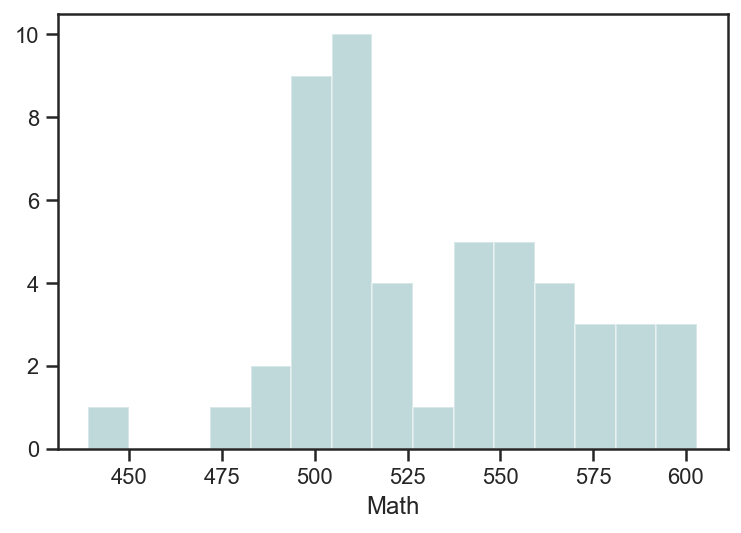

In [907]:
sns.distplot(sats['Math'], kde=False, bins=15, color="cadetblue");

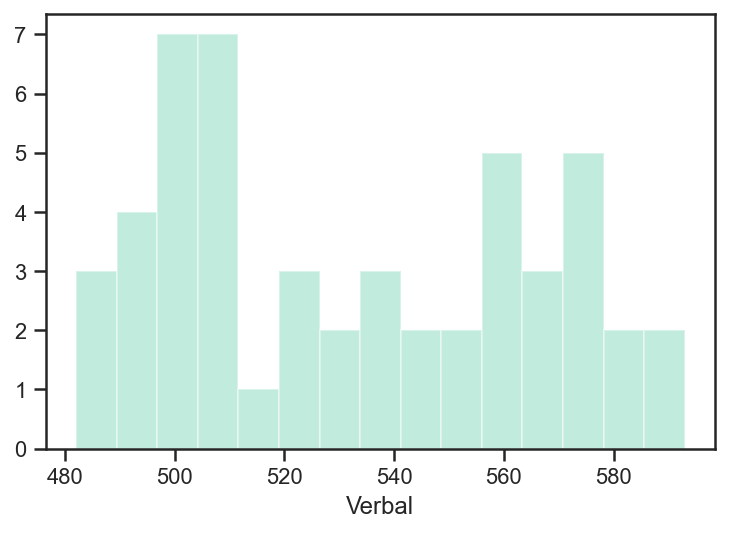

In [908]:
sns.distplot(sats['Verbal'], bins=15, kde=False, color="mediumaquamarine");

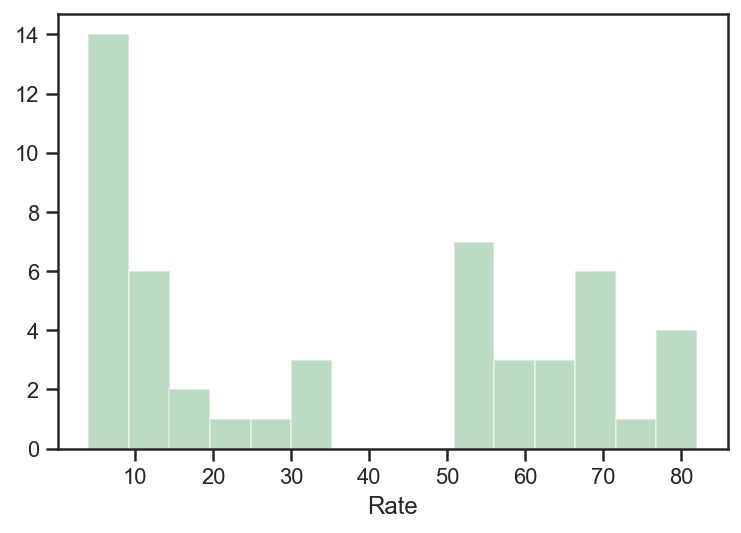

In [909]:
sns.distplot(sats['Rate'], bins=15, kde=False, color="g");

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

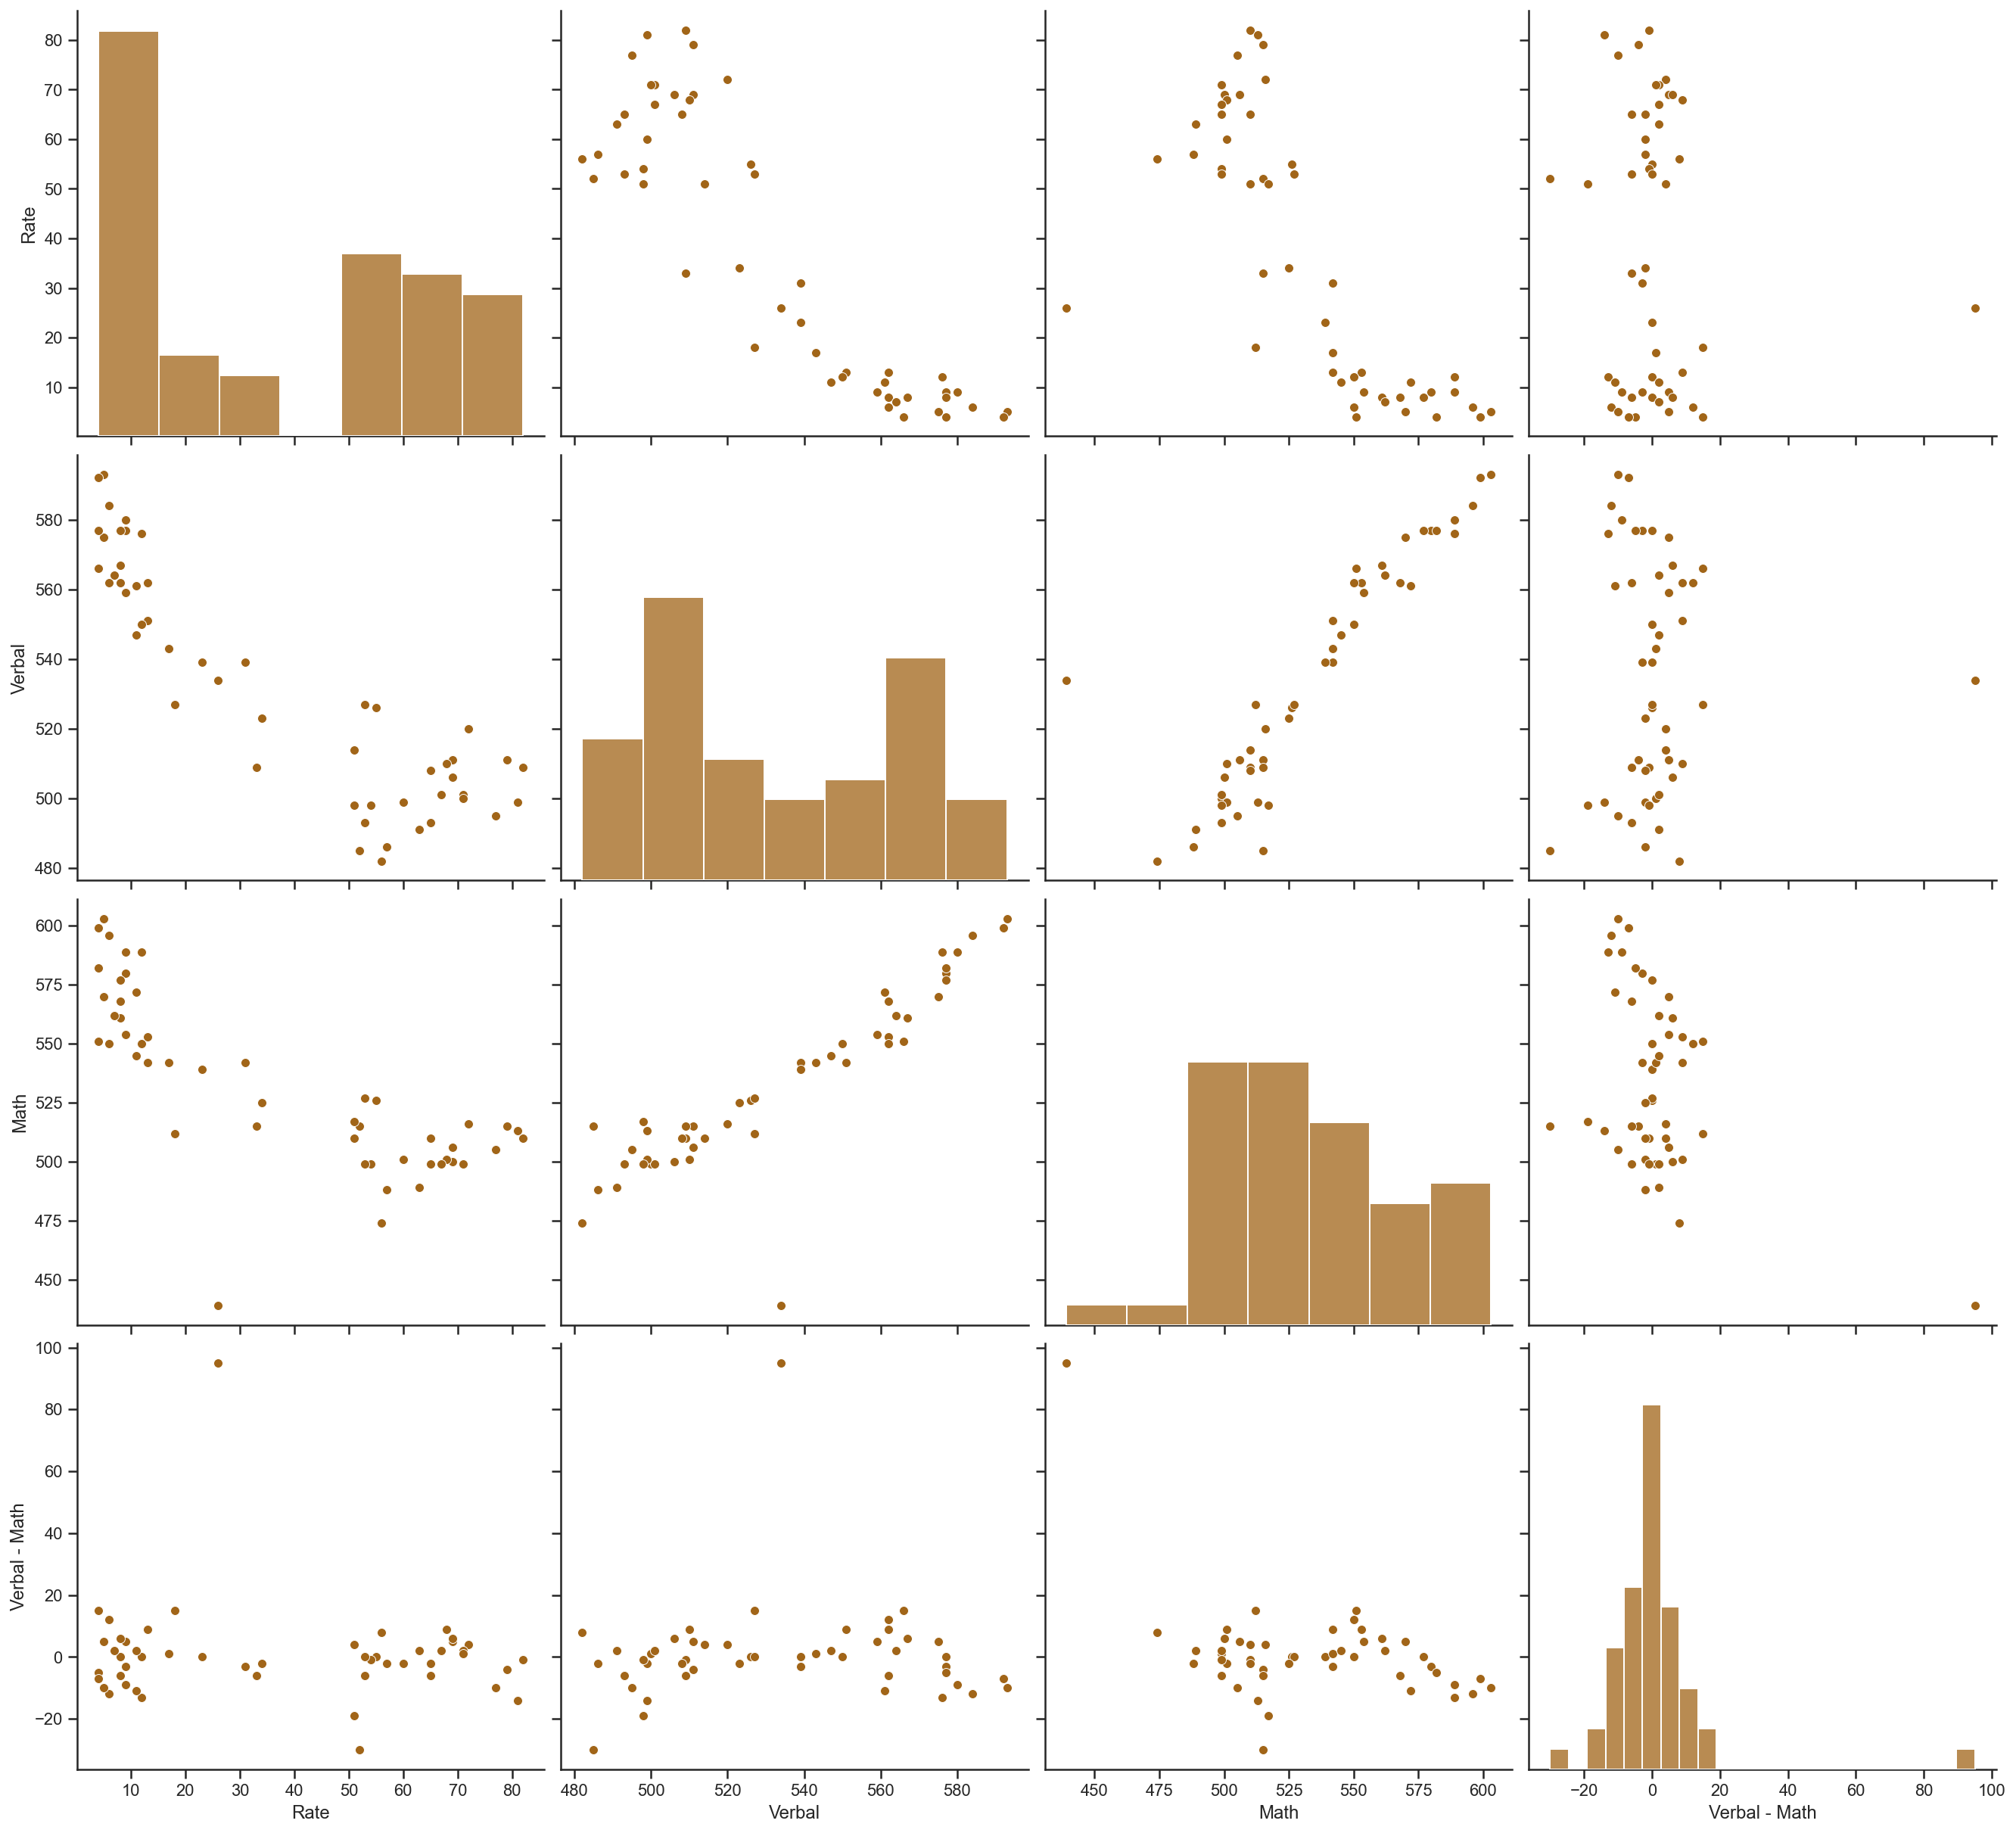

In [1162]:
sns.pairplot(sats, height=4.27, aspect=4.7/4.27, palette='BrBG');

In [ ]:
# Explain what the visualization tells you about your data.


# I can see a positive relationship between Verbal and Math scores, as the Verbal scores increase so do the Math 
# scores (and visa versa). There is also a negative relationship between Rate and either Verbal or Math Scores,
# leading us to believe that as Rate rises, Verbal and Maths scores will decrease. 

# I can also see a piece of data that is low on math score and may be an outlier.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

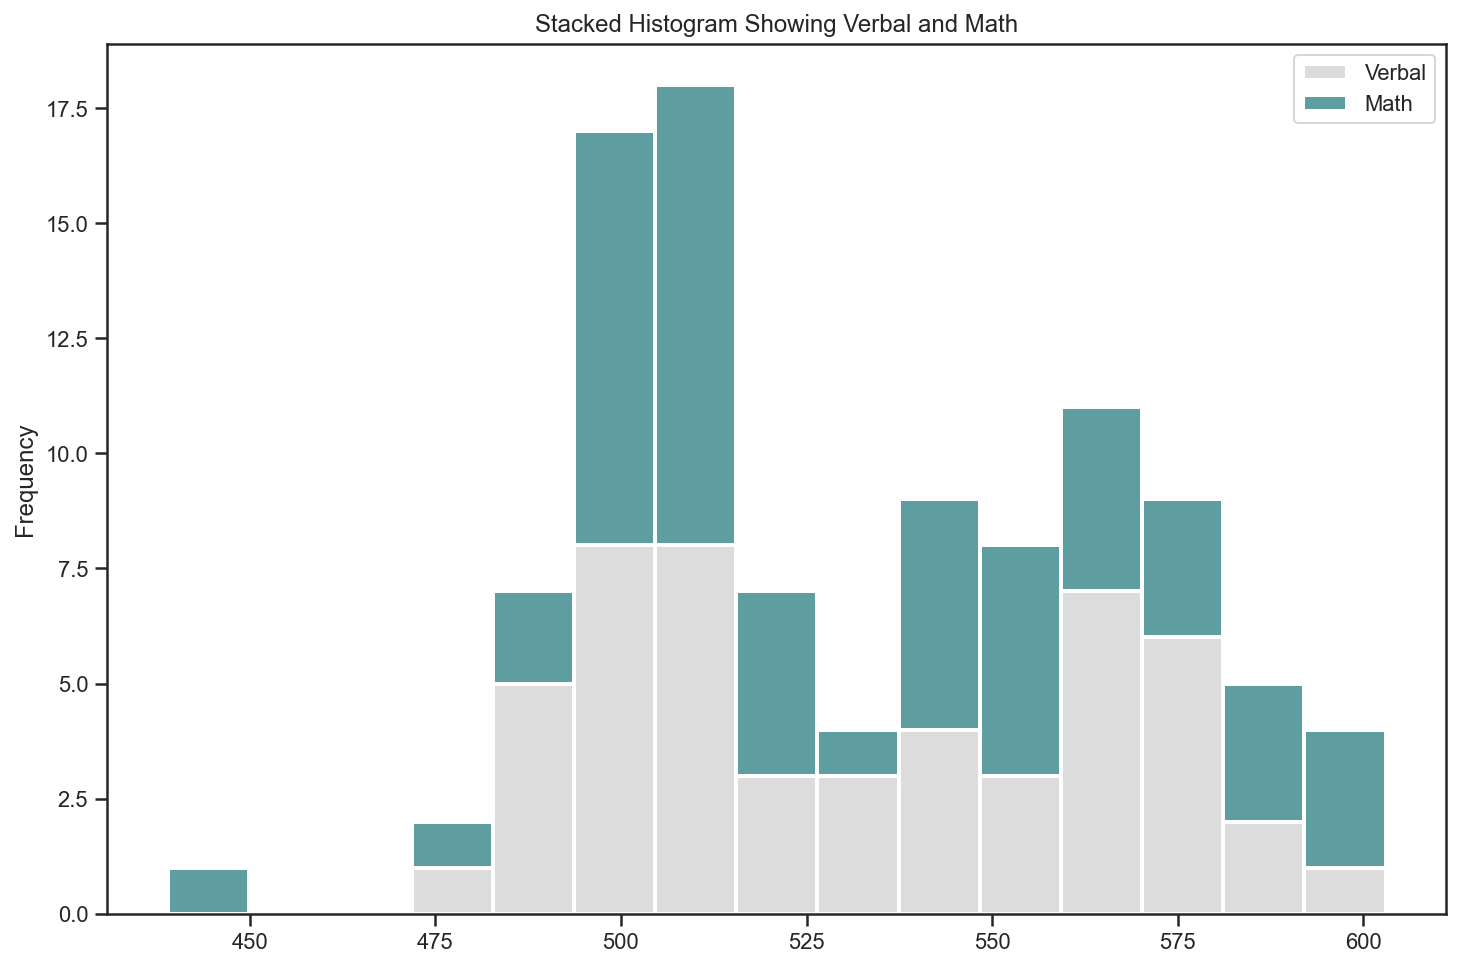

In [911]:
v_b = ['Verbal', 'Math']
colors = ["gainsboro", "cadetblue"]
sats[v_b].plot.hist(stacked=True, bins=15, color = colors, linewidth=2, figsize=(12,8)).set_title("Stacked Histogram Showing Verbal and Math");

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

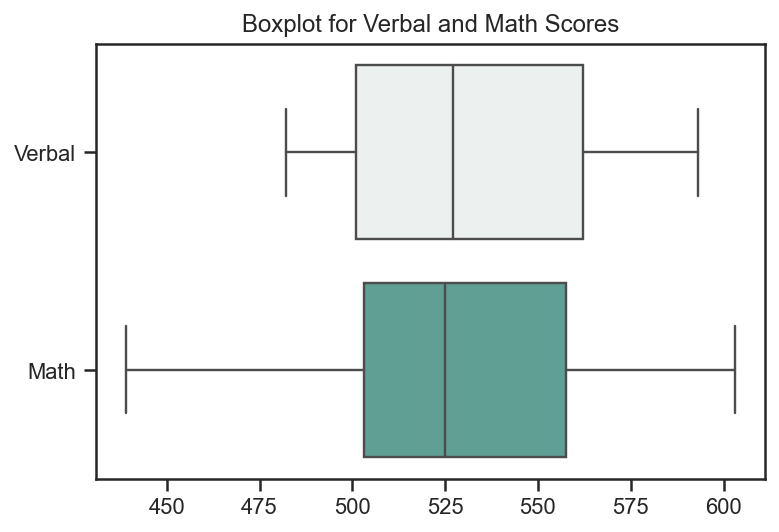

In [912]:
v_b = ['Verbal', 'Math']
sns.boxplot(data = sats[v_b], orient = 'h', palette= "light:#5A9", linewidth=1.2).set_title("Boxplot for Verbal and Math Scores");

In [ ]:
# What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

# A boxplot will show the outliers of the data more clearly, allowing us to investigate further into data that
# may be skewing predictions. It works with the data percentiles and mean.

In [ ]:
# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

# Using sats.describe we can see that the min and max for 'Rate' are 4 and 82 - a much lower scale than the
# min and max for 'Verbal' and 'Math' which have values around 400 and 600 respectively. The 'Rate' boxplot 
# would therefore sit far left on the scale when placed with 'Verbal' and 'Math'.

In [913]:
sats.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [914]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [915]:
Verbal_stand = var_standardized(sats.Verbal)
print("Verbal Mean", sats.Verbal.mean(), "Verbal Standard deviation: ", Verbal_stand.std())


Verbal Mean 532.5294117647059 Verbal Standard deviation:  0.9999999999999998


In [916]:
Math_stand = var_standardized(sats.Math)
print("Math Mean", sats.Math.mean(), "Math Standard deviation:", Math_stand.std())

Math Mean 531.843137254902 Math Standard deviation: 1.0000000000000002


In [917]:
Rate_stand = var_standardized(sats.Rate)
print("Rate Mean", sats.Rate.mean(), "Rate Standard deviation:", Rate_stand.std())

Rate Mean 37.0 Rate Standard deviation: 0.9999999999999998


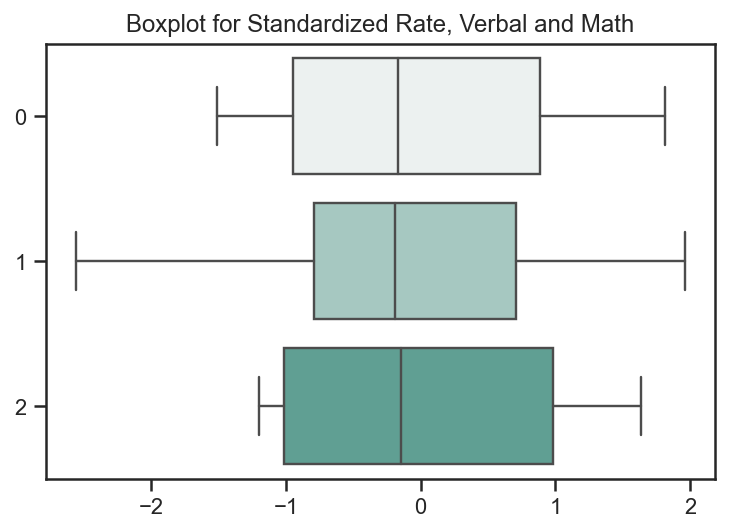

In [925]:
stand_vb = [Verbal_stand, Math_stand, Rate_stand]
sns.boxplot(data = stand_vb, orient = 'h', palette= "light:#5A9", linewidth=1.2).set_title("Boxplot for Standardized Rate, Verbal and Math");

In [ ]:
# Explain your rationale for the choices on the chart. 

# I first standardized the variables so they would all be able to sit on the same scale within a plot. 
# I then placed the new standardized variables into a boxplot to show the the distribution of the data and 
# skewness for all 3 variables. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [926]:
# Find the mean
sats.Verbal.mean(skipna = True)

532.5294117647059

In [927]:
# Find the list of states that have Verbal scores greater than the average of Verbal scores across states
sats[(sats['Verbal'] > sats.Verbal.mean(skipna = True))]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [928]:
# How many states are above the mean? 
sats[(sats['Verbal'] > sats.Verbal.mean(skipna = True))].value_counts().sum()

24

In [ ]:
# What does this tell you about the distribution of Verbal scores?

# Approximately half of the scores (24 out of 50) are close to the mean. This indicates a close to normal,
# but slightly skewed to the left, distribution.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [934]:
sats.Verbal.median()

527.0

In [933]:
sats[(sats['Verbal'] > sats.Verbal.median(skipna = True))]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [932]:
# How many states are above the mean? 
sats[(sats['Verbal'] > sats.Verbal.median(skipna = True))].value_counts().sum()

24

In [ ]:
# How does this compare to the list of states greater than the mean of Verbal scores? Why?

# All the states with scores higher than mean also have scores higher than median, the median is close to,
# but slighter lower than the mean. As the mean and median have very close values we can assume that this means the distribution is close to normal.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [935]:
sats['Verbal - Math'] = sats.Verbal-sats.Math
sats.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

Your first DataFrame should be the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math. It should be sorted appropriately to show the ranking of states.

In [936]:
sats.sort_values('Verbal - Math', ascending=False).head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


Your second DataFrame will be the inverse: states with the greatest gap between Verbal and Math such that Math is greater than Verbal. Again, this should be sorted appropriately to show rank.

In [937]:
sats.sort_values('Verbal - Math', ascending=True).head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


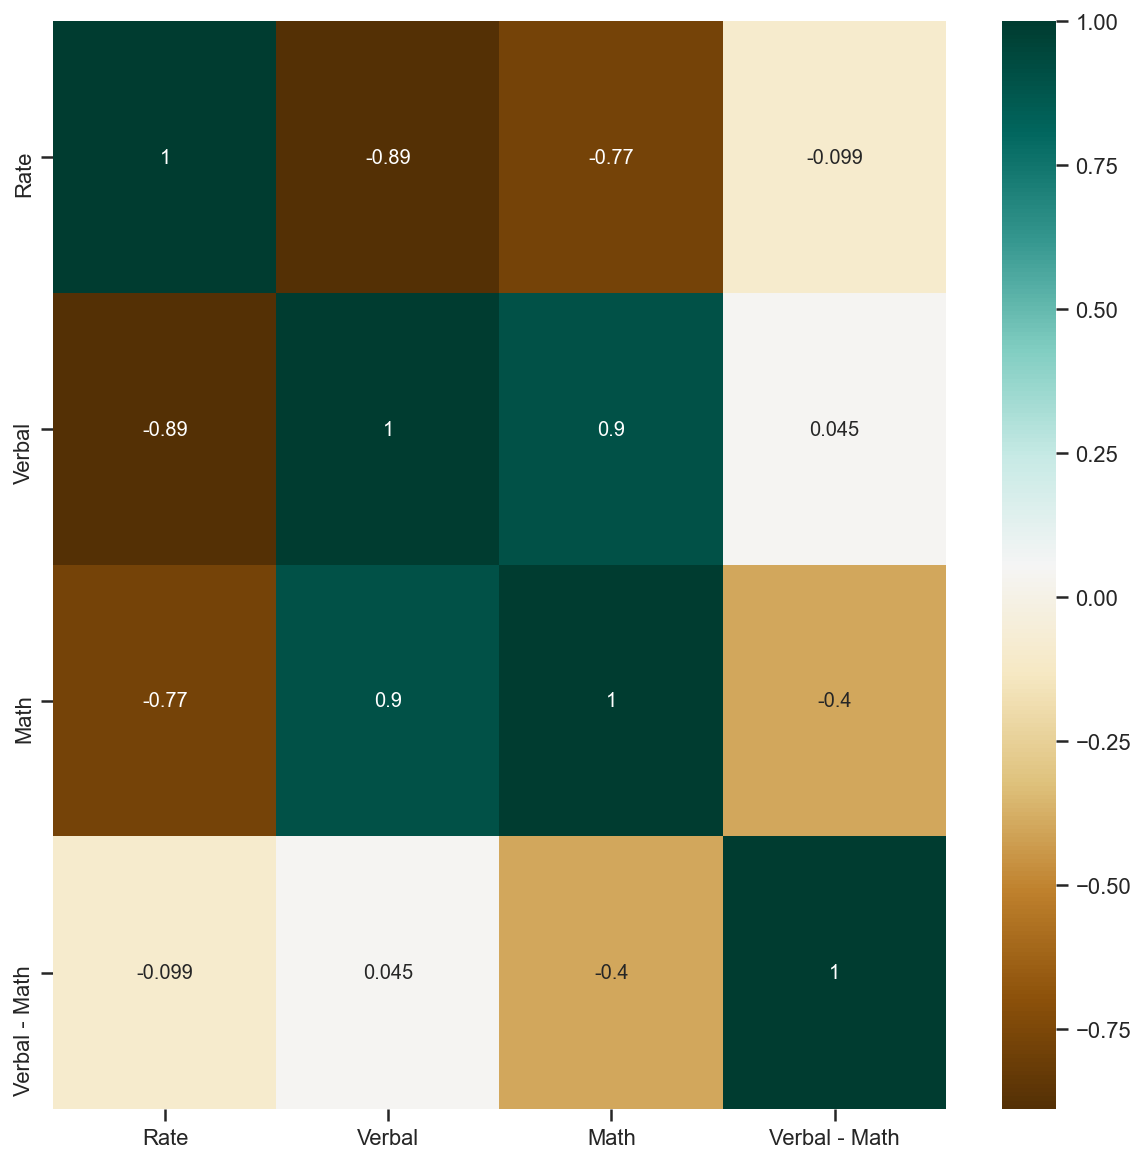

In [938]:
plt.figure(figsize=(10, 10))
sns.heatmap(sats.corr(), cmap='BrBG', annot=True)
plt.show()

In [ ]:
# What does the correlation matrix tell you?

# Similiar to the findings in the pairplot, I can see a strong positive relationship between Verbal and 
# Math scores, likely the better a State will do in one they will also perform well in the other. There are also 
# strong negative correlations between Rate and either Verbal or Math Scores, leading us to believe that as 
# Rate rises, Verbal and Maths scores will decrease. We can also see that the higher the Verbal - Math score 
# the more likely the Verbal score will be higher and the Math score will be lower.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [939]:
sats.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [ ]:
# Write up what each of the rows returned by the function indicate.

# count = the number of rows of data in the column
# mean = the average value of the values in that column
# std = the standard deviation of the values in that column
# min = the smallest value in the column
# 25% = the 25th percentile value of the variable distribution
# 50% = the 50th percentile value of the variable distribution (also median)
# 75% = the 75th percentile value of the variable distribution
# max = the largest value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [940]:
sats[['Rate', 'Verbal', 'Math', 'Verbal - Math']].cov()

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


In [ ]:
# Describe how the covariance matrix is different from the correlation matrix.

# Covariance shows us if both variables vary in the same direction (positive covariance) or in the 
# opposite direction (negative covariance). Whereas correlation explains how much change in one variable 
# leads to how much change in the second variable. 

In [ ]:
# What is the process to convert the covariance into the correlation?

# You can obtain the correlation of two variables by dividing the covariance of these variables by the product 
# of the standard deviations of the same values. 
# e.g. correlation for (X,Y) = covariance(X,Y) / standard deviation(X)standard deviation(Y)

In [ ]:
# Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

# The covariance is not very interpretable. The values are difficult to read because they are relative to the 
# variance of the variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [511]:
drugs = pd.read_csv('/Users/KStamp/Desktop/GA/resource-datasets/project_2/drug-use-by-age.csv')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [ ]:
# I read on the github page that 'drug'use = percentage and 'drug'frequency = median

In [388]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [948]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [946]:
drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [951]:
drugs['crack-frequency'].loc[0]

nan

In [ ]:
# Using the above methods, I can see:
# - its a dataframe
# - it has 17 rows (entries)
# - it has 28 columns
# none of the columns have any empty cells, however there are some NaN values in 6 of the columns **
# age/cocaine-freq/crack-freq/heroin-freq/inhalant-freq/oxycontin-freq/meth-freq are all classed as 
# datatype object (we would expect them to be int or float)

# ** On further inspection I can see the NaN values are actually filled in using '-'
# I will not be able to run accurate EDA with those values still in place.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
# First I cleaned the data.

In [517]:
# Update the values in age so they are seen as floats
# I selected the median values of the strings as the new number
drugs['age'] = drugs['age'].replace(['22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], ['23', '25', '27', '32', '42', '57', '65'])

In [518]:
drugs.tail(8)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,27,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,32,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,42,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,57,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [519]:
# Calling the .dtype function to check the column is a float
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [520]:
# I then called the below function with .applymap to convert the '-' figures to Nan
def convert_to_float(x):
    try: 
        return float(x)
    except:
        return np.nan

In [521]:
drugs = drugs.applymap(convert_to_float)

In [ ]:
# This in turn converted the age column to float as well.

In [522]:
# Check the columns are now .dtype floats
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     float64
 1   n                        17 non-null     float64
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [424]:
# Now we can look at the covariance of the columns

drugs.cov()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,235.492647,6.017710e+03,152.767279,210.819853,-69.422426,88.477941,-5.115074,85.525000,0.547794,192.244505,...,-3.605515,-4.962500,-6.797794,-55.068015,-8.743382,928.492647,-1.075368,123.604762,-0.781618,171.205882
n,6017.709559,1.684520e+06,10832.454412,8672.477941,-2623.407721,3231.628676,-50.848529,3886.733333,86.231618,13952.631868,...,-131.070956,-413.883333,-161.769118,-1524.952206,-368.363603,-12809.040441,-21.680147,21171.742857,-21.492647,8273.788603
alcohol-use,152.767279,1.083245e+04,722.473456,514.513971,191.003015,454.289338,37.770110,56.591667,5.560184,84.153297,...,9.632647,-18.487500,34.676691,-169.944853,22.030074,-64.970221,4.820551,224.716905,1.180551,60.909926
alcohol-frequency,210.819853,8.672478e+03,514.513971,454.492647,66.347426,320.522059,22.371324,67.591667,3.945956,119.607143,...,3.261765,32.904167,16.766544,-101.619485,8.755882,477.101103,2.381618,167.861905,0.087868,106.637868
marijuana-use,-69.422426,-2.623408e+03,191.003015,66.347426,143.035662,135.195221,19.203088,-25.139167,1.750147,-89.565110,...,7.068493,-47.267083,19.611103,-55.187132,16.298309,-400.128676,2.735441,4.942619,1.017941,-82.312684
marijuana-frequency,88.477941,3.231629e+03,454.289338,320.522059,135.195221,337.183824,24.773529,37.983333,3.862132,32.208791,...,6.808456,9.875000,24.737868,-124.735294,14.507353,-109.647059,3.205147,164.607143,1.011397,22.242647
cocaine-use,-5.115074,-5.084853e+01,37.770110,22.371324,19.203088,24.773529,3.300662,-2.351667,0.357978,-10.304945,...,0.956507,-1.717500,2.932022,-6.153493,2.362941,-48.308824,0.424559,2.405714,0.115809,-7.218566
cocaine-frequency,85.525000,3.886733e+03,56.591667,67.591667,-25.139167,37.983333,-2.351667,64.616667,0.465000,135.798077,...,-1.284167,-24.358333,-2.580833,-13.662500,-3.778333,39.745833,-0.382500,45.752381,-0.123333,159.370833
crack-use,0.547794,8.623162e+01,5.560184,3.945956,1.750147,3.862132,0.357978,0.465000,0.055588,0.659341,...,0.086471,0.165833,0.319412,-0.936029,0.205110,-5.964706,0.043015,2.001190,0.014265,0.536765
crack-frequency,192.244505,1.395263e+04,84.153297,119.607143,-89.565110,32.208791,-10.304945,135.798077,0.659341,328.017857,...,-5.103846,-46.686813,-11.242857,-21.858516,-12.098352,98.737637,-1.606044,156.141484,-0.135165,303.717033


In [425]:
# We can use the Pearson correlation to delve into these relationships further
drugs.corr()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,1.000000,0.302137,0.370366,0.644406,-0.378259,0.313988,-0.183469,0.894435,0.151404,0.881916,...,-0.386297,-0.032597,-0.252641,-0.312444,-0.404752,0.703759,-0.266689,0.324328,-0.369084,0.449254
n,0.302137,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.370366,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.644406,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.378259,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.313988,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.183469,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.894435,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.151404,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.881916,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218


In [ ]:
# In order to examine the correlations closer I have split the dataframe into 2 subsets
# We can then compare the 'use' columns and the 'frequency' columns

In [426]:
drugs_use = drugs.filter(regex='use$', axis=1)

In [501]:
drugs_use.head(3)

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2


In [502]:
drugs_use.corr().head(3)

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914


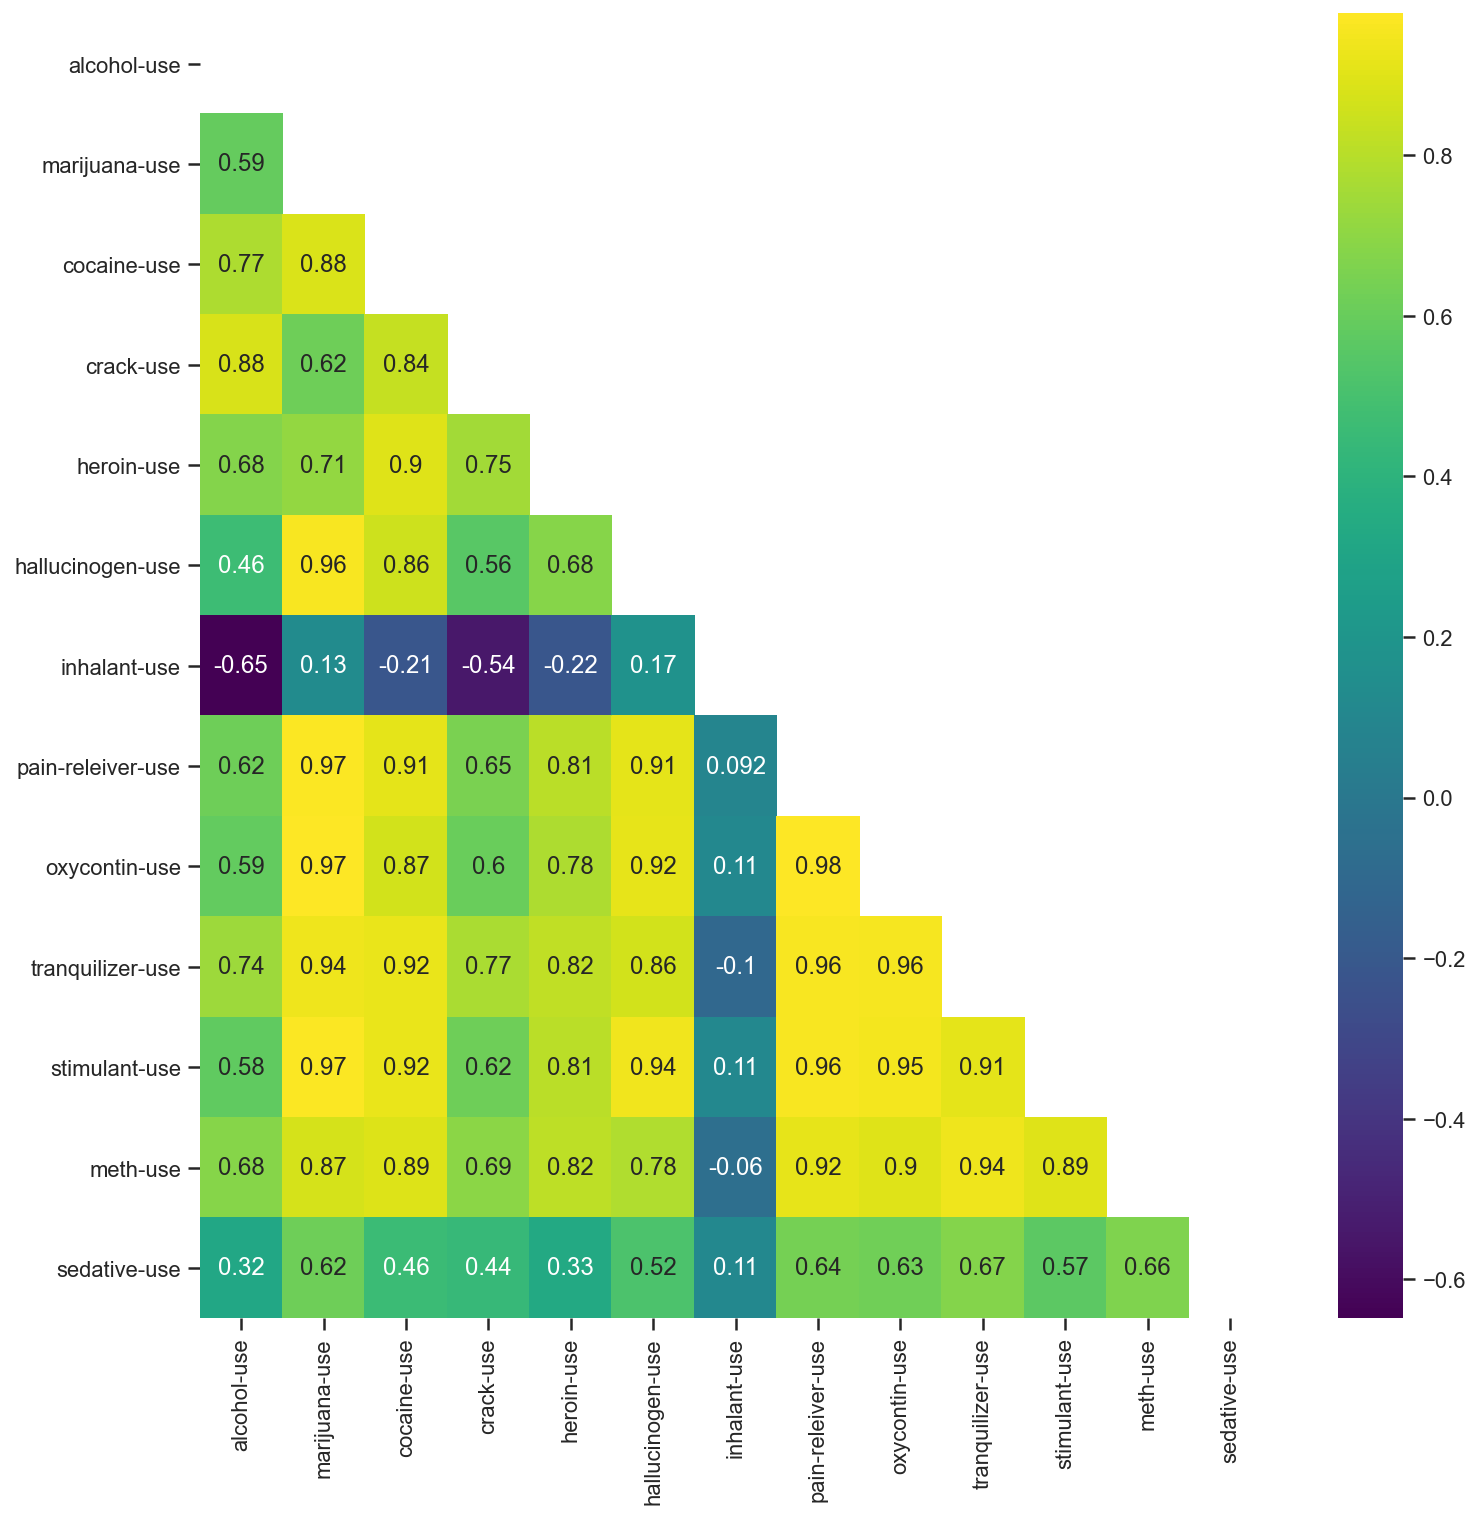

In [544]:
# I have then plotted the 'use' columns correlations onto a heatmap
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(drugs_use.corr(), dtype=bool))
sns.heatmap(drugs_use.corr(), cmap='viridis', mask=mask, annot=True, xticklabels=drugs_corr.columns, yticklabels=drugs_corr.columns);

In [ ]:
# We can see that the lighter (or more yellow) the box the more positive the correlation.
# The darker (or more purple) the box the more negative the correlation is.

In [952]:
drugs_freq = drugs.filter(regex='frequency$', axis=1)

In [953]:
drugs_freq.head(3)

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5


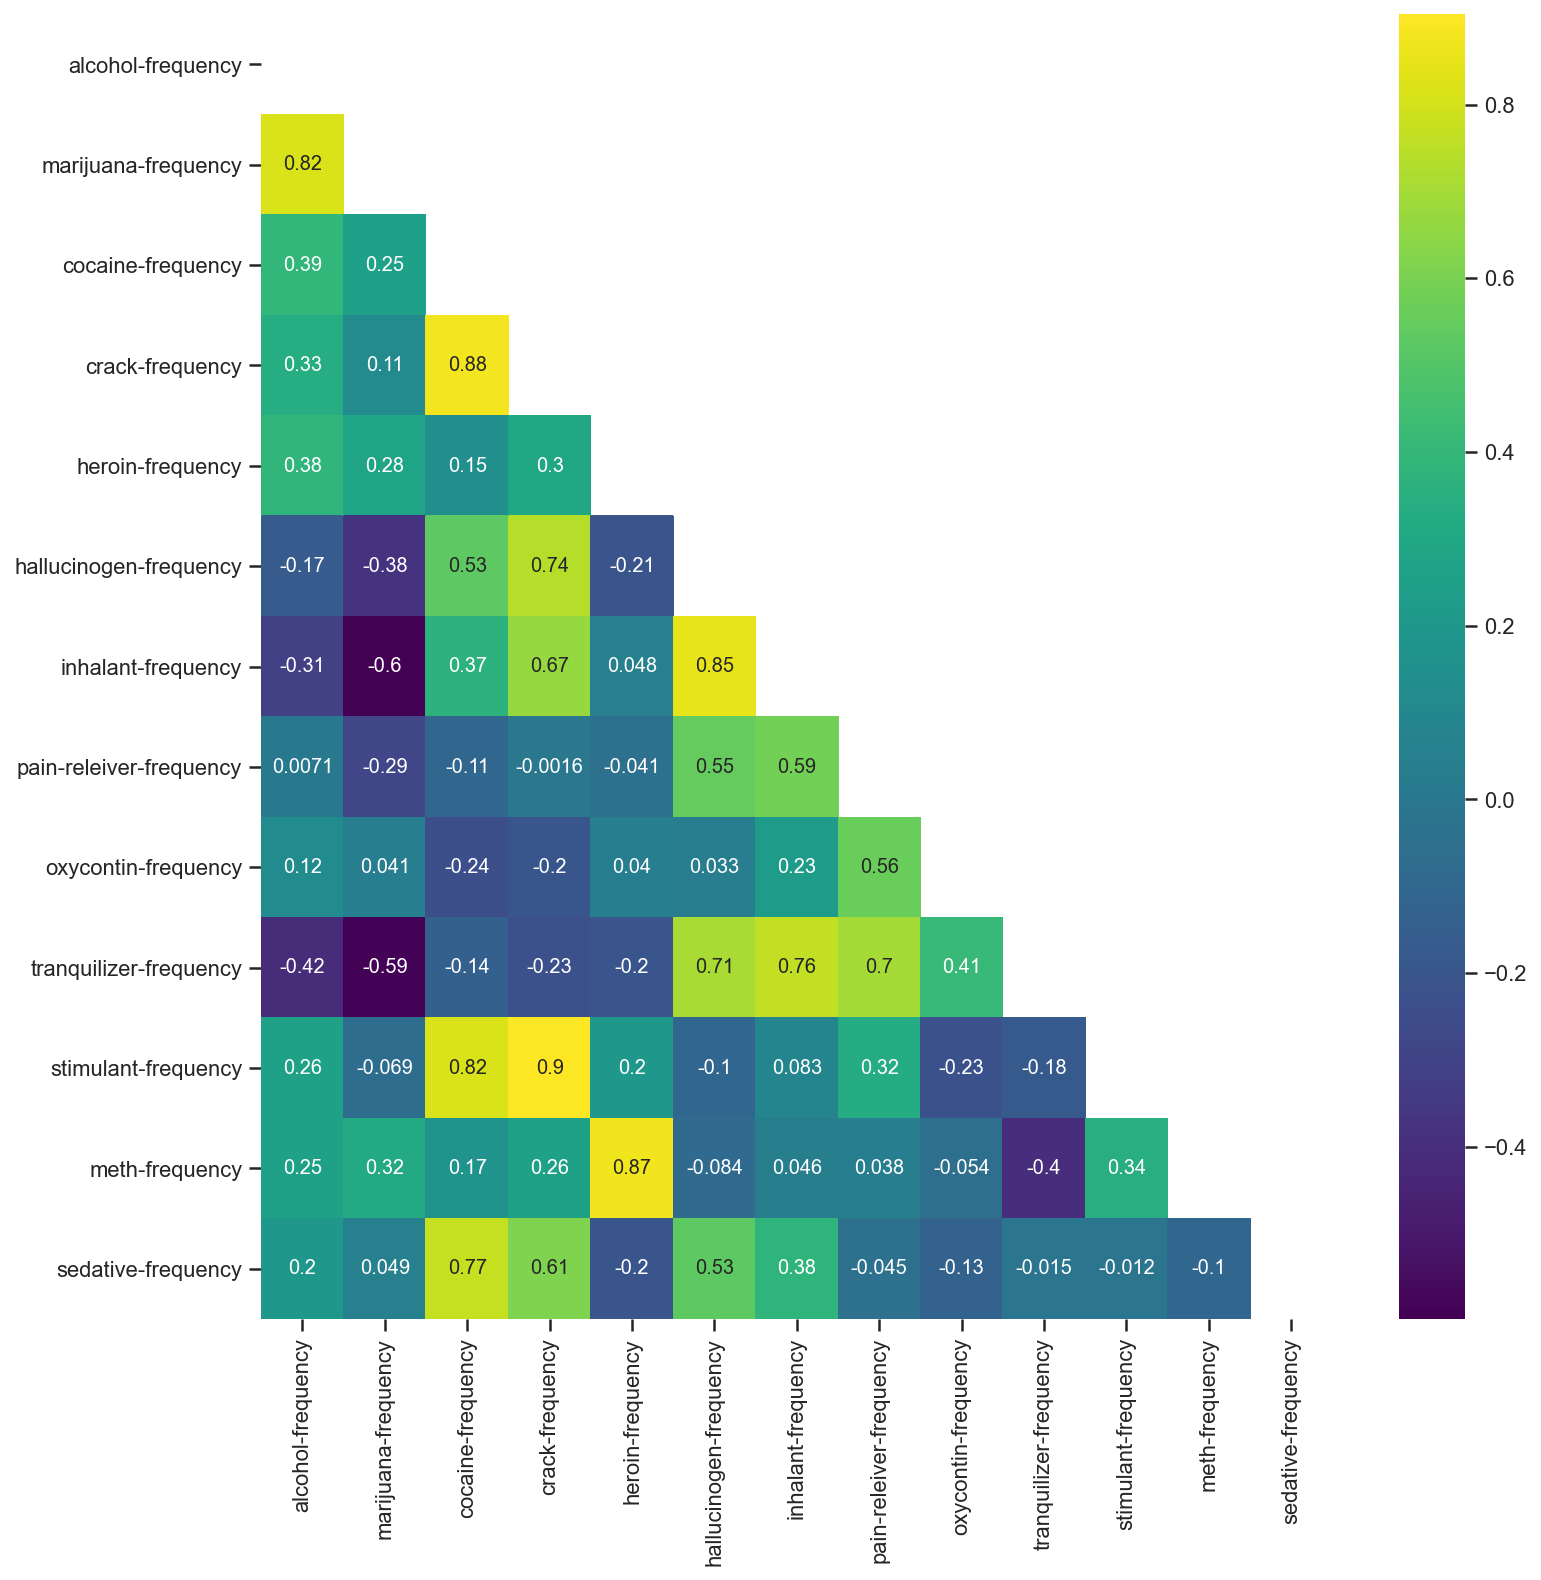

In [959]:
plt.figure(figsize=(12, 12))
mask2 = np.triu(np.ones_like(drugs_freq.corr(), dtype=bool))
sns.heatmap(drugs_freq.corr(), mask=mask2, cmap='viridis', annot=True);

In [ ]:
# Here the heatmap shows the same colours for frequency as it does use (above), what is interesting is that the 
# second heatmap has a higher amount of darker colours and therefore a correlation less likely to be a 
# positive one between the drug frequencies.
# The first heatmap shows more positive correlations between use of one drug and use of another.

In [558]:
# What also interested me was difference in relationships between 'age' and drug-use, then drug-frequency.
drugs_use['age'] = drugs.age
drugs_use.mean()

alcohol-use          55.429412
marijuana-use        18.923529
cocaine-use           2.176471
crack-use             0.294118
heroin-use            0.352941
hallucinogen-use      3.394118
inhalant-use          1.388235
pain-releiver-use     6.270588
oxycontin-use         0.935294
tranquilizer-use      2.805882
stimulant-use         1.917647
meth-use              0.382353
sedative-use          0.282353
age                  25.647059
dtype: float64

In [572]:
# Using groupby I selected the mean of each values by age
gb = drugs_use.groupby("age").agg([np.mean])
gb

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
age,,,,,,,,,,,,,
12.0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13.0,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14.0,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15.0,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16.0,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
17.0,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
18.0,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
19.0,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3


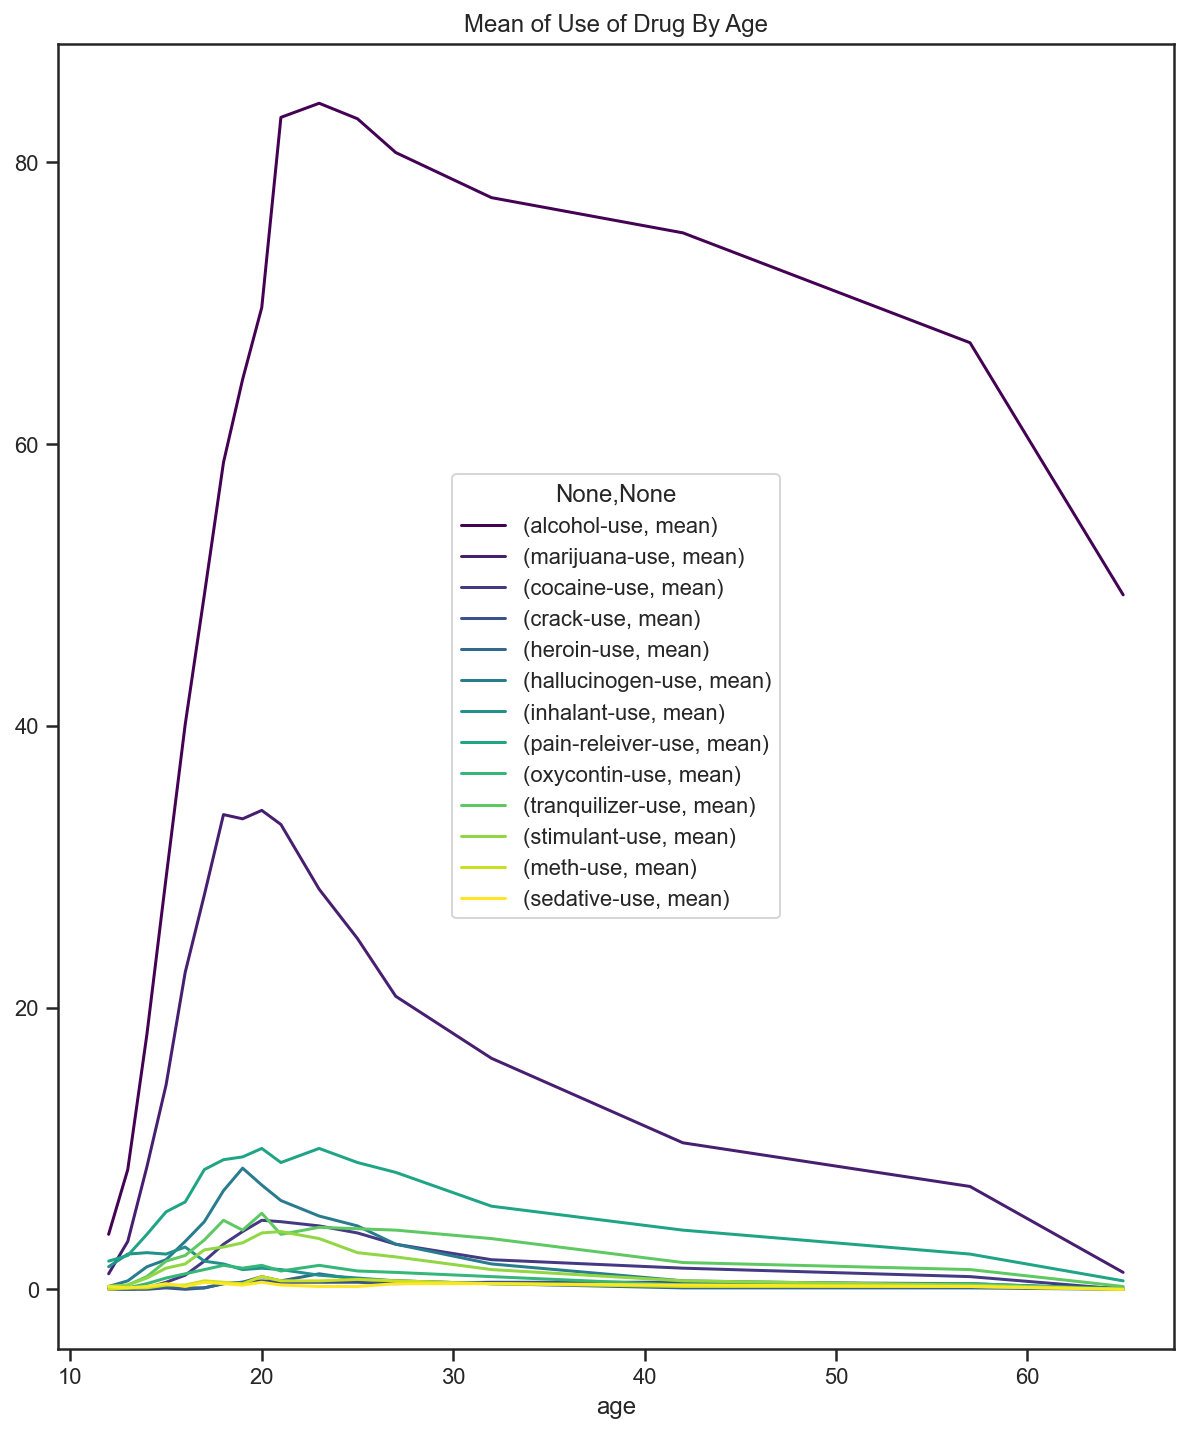

In [963]:
# I then plotted the mean for each drug use by age 
gb.plot(kind = "line", legend=True, title = "Mean of Use of Drug By Age", colormap ='viridis', figsize=(10,12));

In [ ]:
# We can see that most drug-use has a peak around the age of 20, with alcohol and marijuana having the greatest
# peaks around this age. These two drugs also show the highest use across all ages over 13 and alcohol stays very
# high even at an older age when most other drug-use has reduced near to 0.

In [1260]:
# drugs_freq['age'] = drugs.age
drugs_freq.mean()

alcohol-frequency          33.352941
marijuana-frequency        42.941176
cocaine-frequency           7.875000
crack-frequency            15.035714
heroin-frequency           73.281250
hallucinogen-frequency      8.411765
inhalant-frequency          6.156250
pain-releiver-frequency    14.705882
oxycontin-frequency        14.812500
tranquilizer-frequency     11.735294
stimulant-frequency        31.147059
meth-frequency             35.966667
sedative-frequency         19.382353
age                        25.647059
dtype: float64

In [971]:
gb2 = drugs_freq.groupby("age").agg([np.mean])
gb2

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
age,,,,,,,,,,,,,
12.0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
13.0,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
14.0,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
15.0,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
16.0,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
17.0,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
18.0,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
19.0,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0


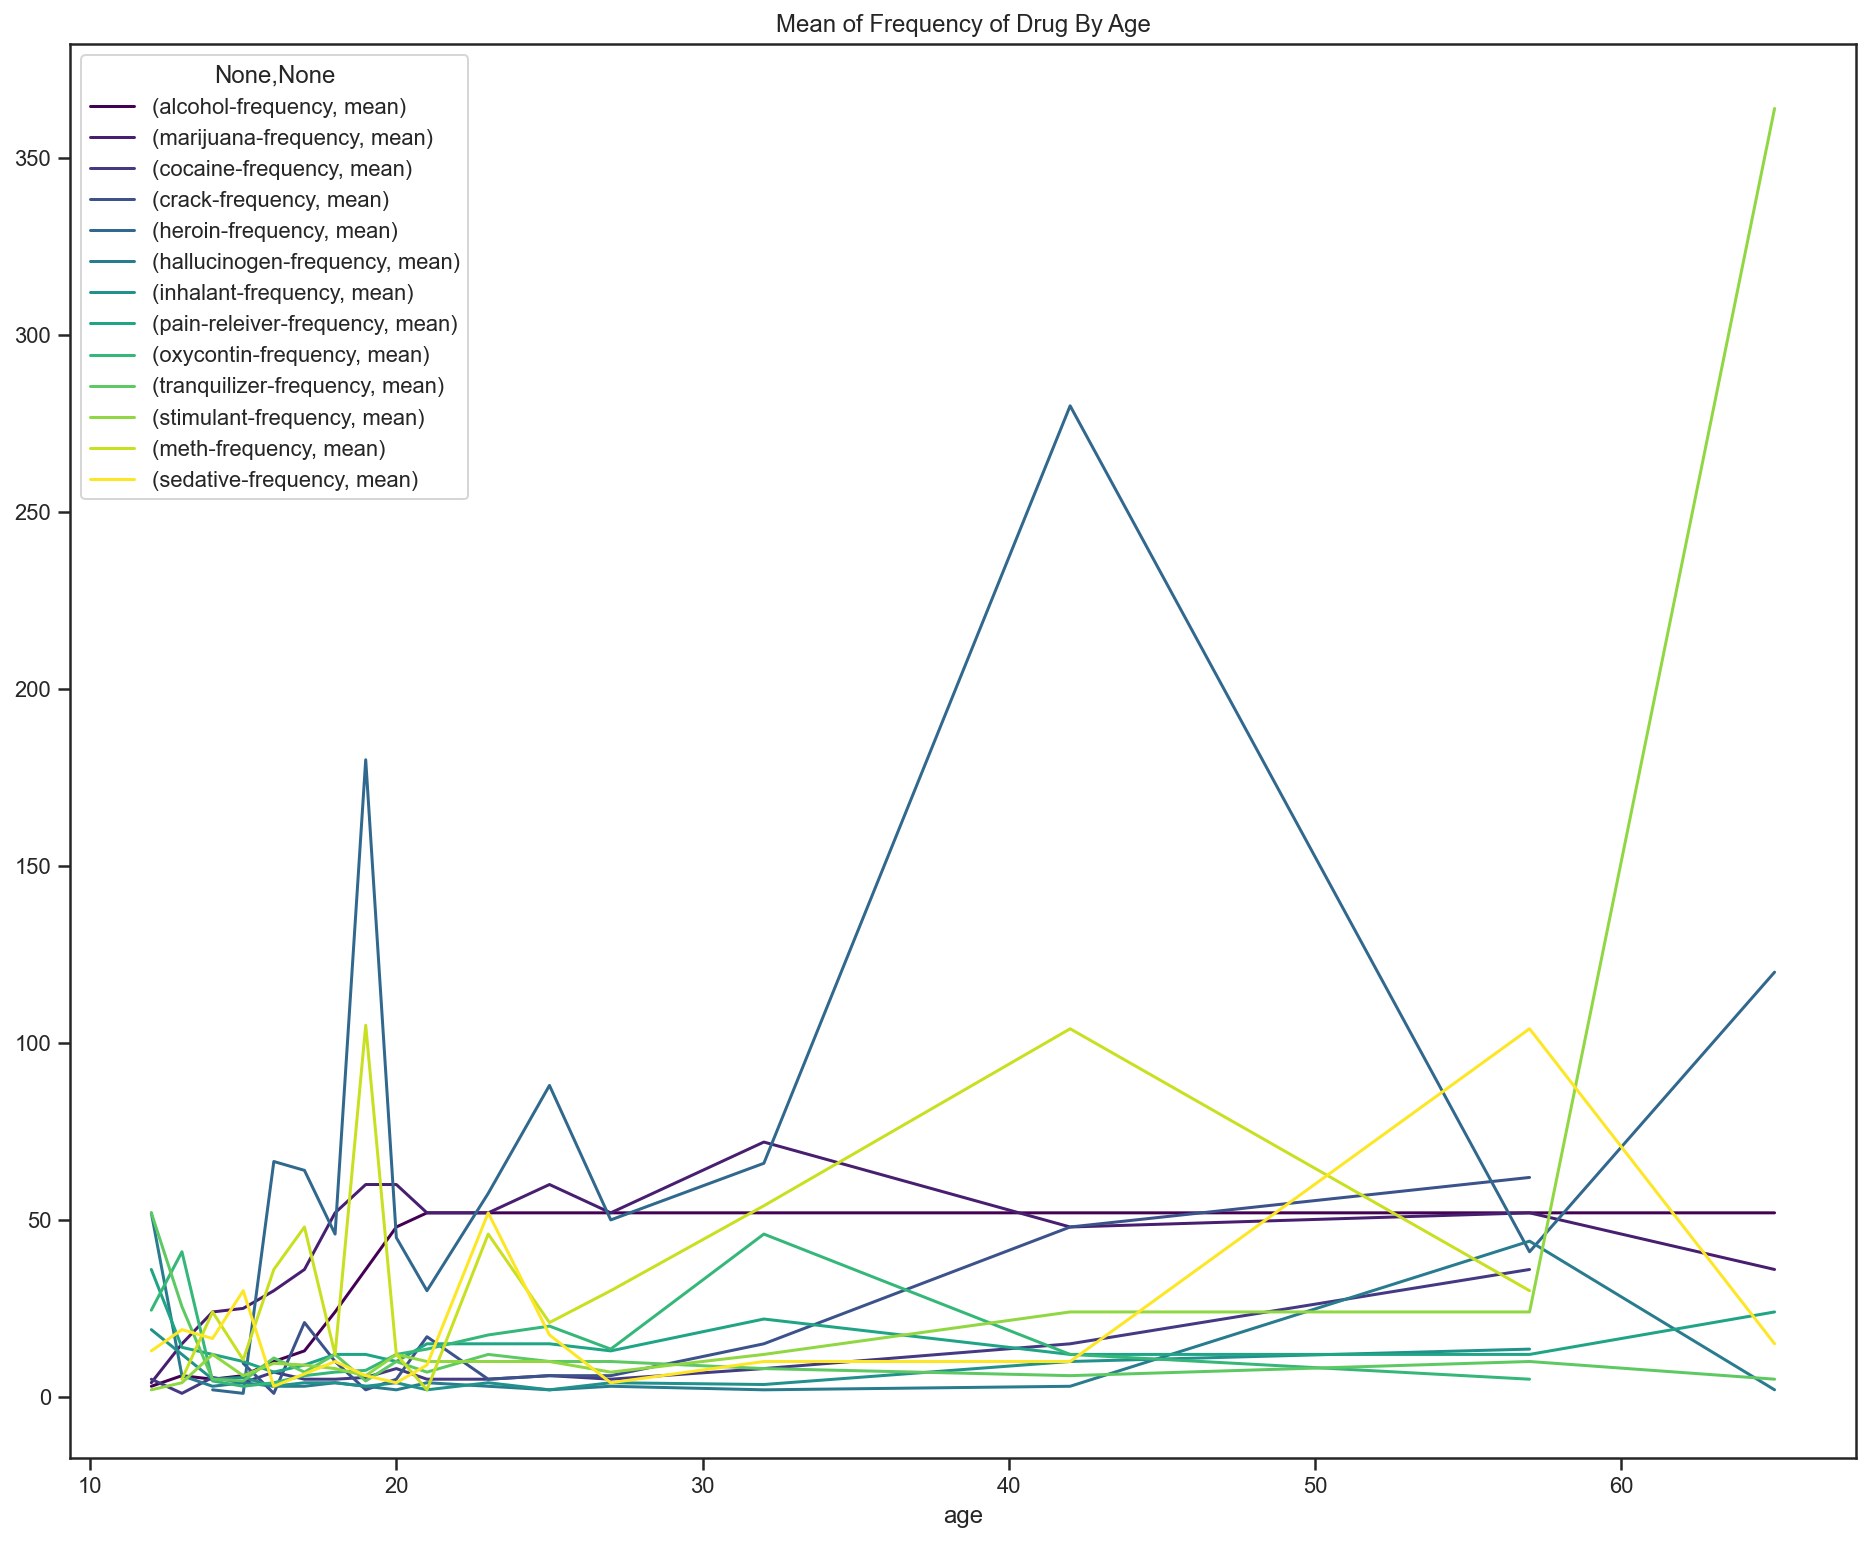

In [972]:
gb2.plot(kind = "line", legend=True, title = "Mean of Frequency of Drug By Age", colormap ='viridis', figsize=(16,13));

In [ ]:
# The drugs-fruqency vs age plot shows a different story to the drugs-use vs age, there are alot of more random 
# peaks of data. The most obvious that we can see is that there are 2 large spikes in some sets of data, the first
# around the age of 20 again and the second, and higher, is the peak around 32 to 55. There is also a huge spike
# in stimulant frequency for those aged 65, which wasn't apparent on the drug-use plot.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# We can hypothesise that there is a strong correlation between the use of pain-relievers and the use of oxycontin.
# Does the correlation change with age?
# Are there any outliers?

**Report**



...

In [1241]:
hypothesis = drugs[['age', 'pain-releiver-use', 'oxycontin-use']]
hypothesis

,age,pain-releiver-use,oxycontin-use
0,12.0,2.0,0.1
1,13.0,2.4,0.1
2,14.0,3.9,0.4
3,15.0,5.5,0.8
4,16.0,6.2,1.1
5,17.0,8.5,1.4
6,18.0,9.2,1.7
7,19.0,9.4,1.5
8,20.0,10.0,1.7
9,21.0,9.0,1.3


In [1180]:
hypothesis.corr()

,age,pain-releiver-use,oxycontin-use
age,1.000000,-0.436012,-0.386297
pain-releiver-use,-0.436012,1.000000,0.976445
oxycontin-use,-0.386297,0.976445,1.000000


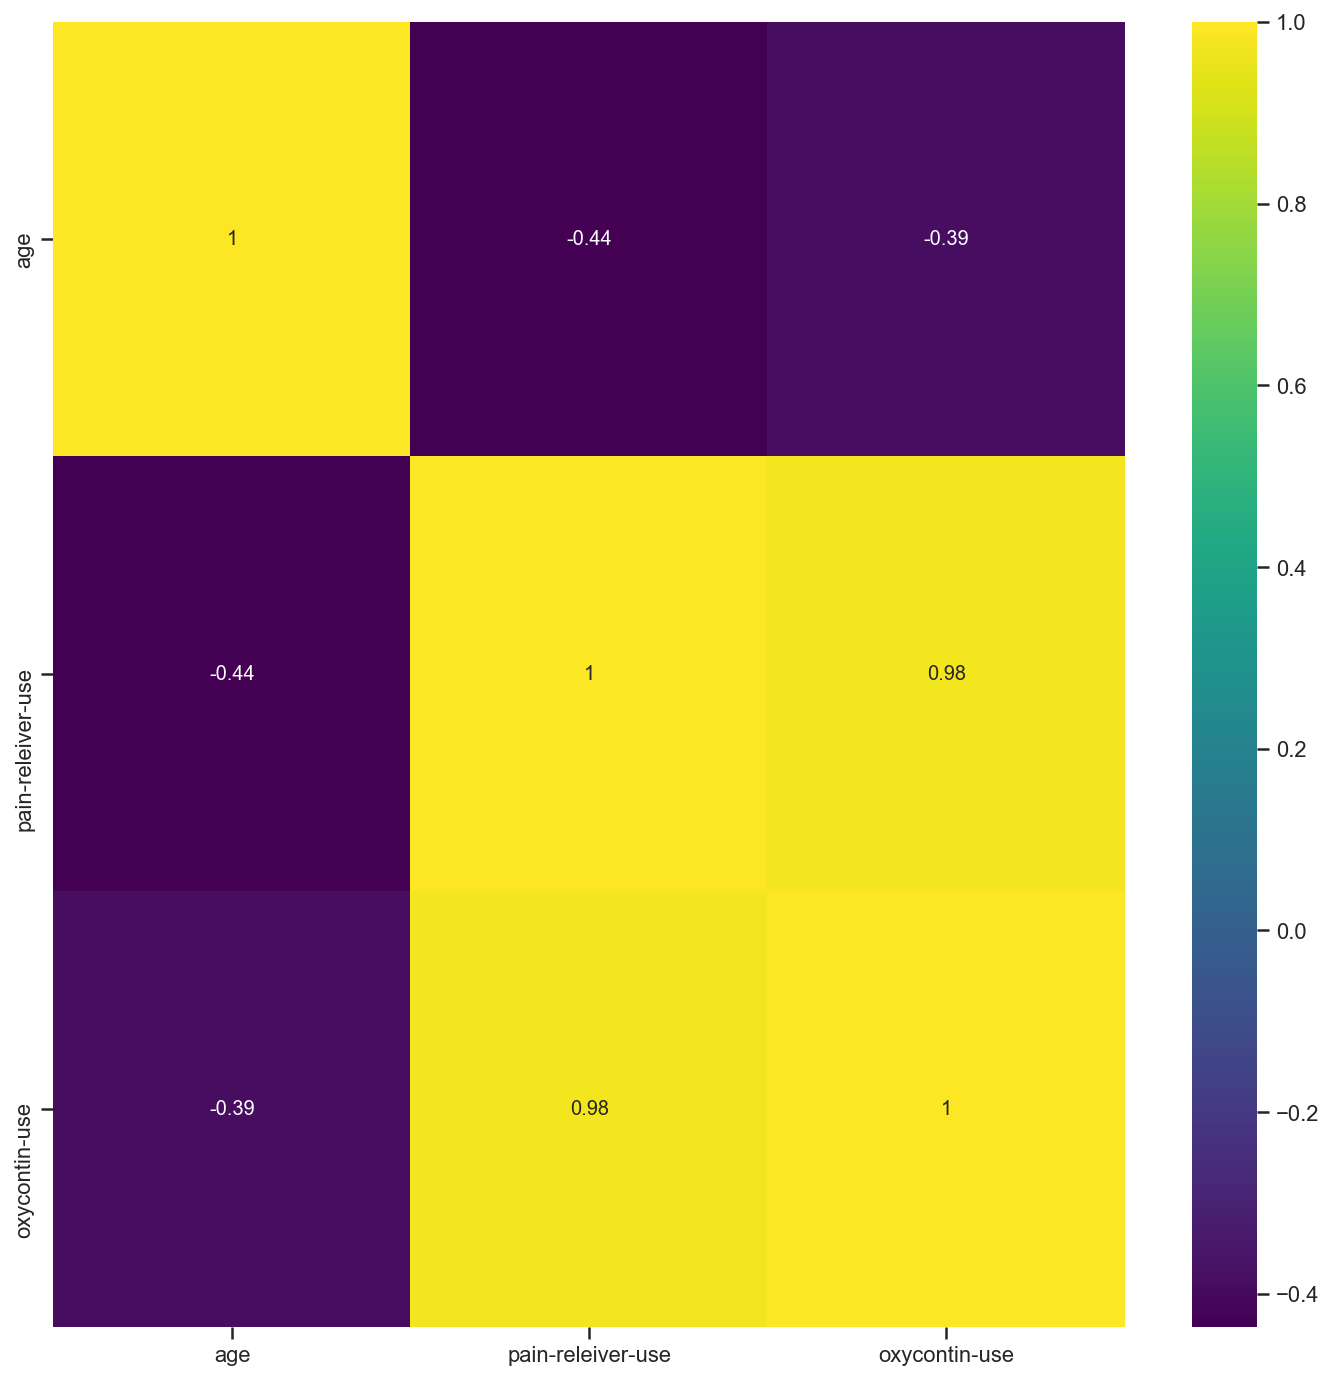

In [1181]:

plt.figure(figsize=(12, 12))
sns.heatmap(hypothesis.corr(), cmap='viridis', annot=True);

In [1182]:
# So from using the heatmap that we created above we can see that there is a strong positive relationship
# between pain-reliever-use and oxycontin-use. Indicating that we were right in our hypothesis.
# However, we can see some negative correlations between age in pain reliever use and age and oxycontin use.

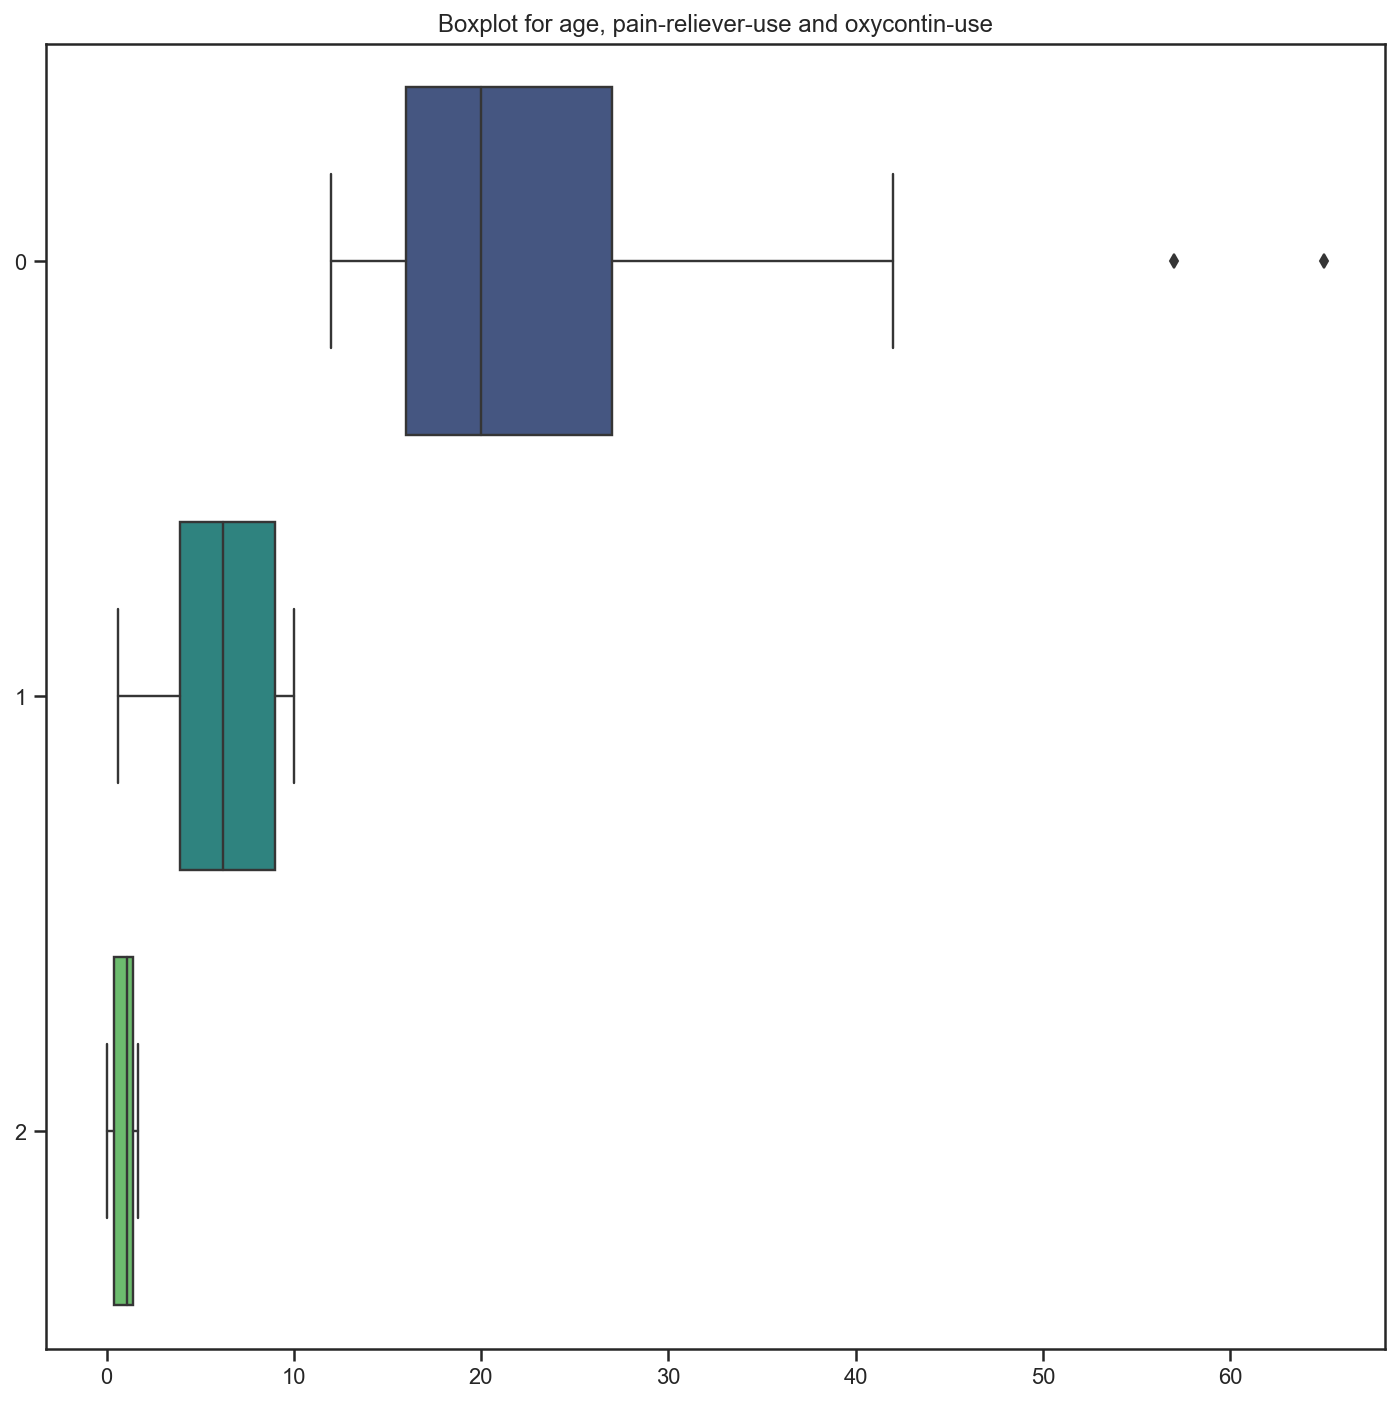

In [1183]:
# I wanted to look for outliers first, before I delve into the correlations further
plt.figure(figsize=(12,12))
hyp = [hypothesis['age'], hypothesis['pain-releiver-use'], hypothesis['oxycontin-use']]
sns.boxplot(data = hyp, orient = 'h', palette= "viridis", linewidth=1.2).set_title("Boxplot for age, pain-reliever-use and oxycontin-use");

In [1184]:
# The boxplot throws up a few observations:
# There are no outliers for the distribution of pain-reliver-use or oxycontin-use.
# There are outliers for age.

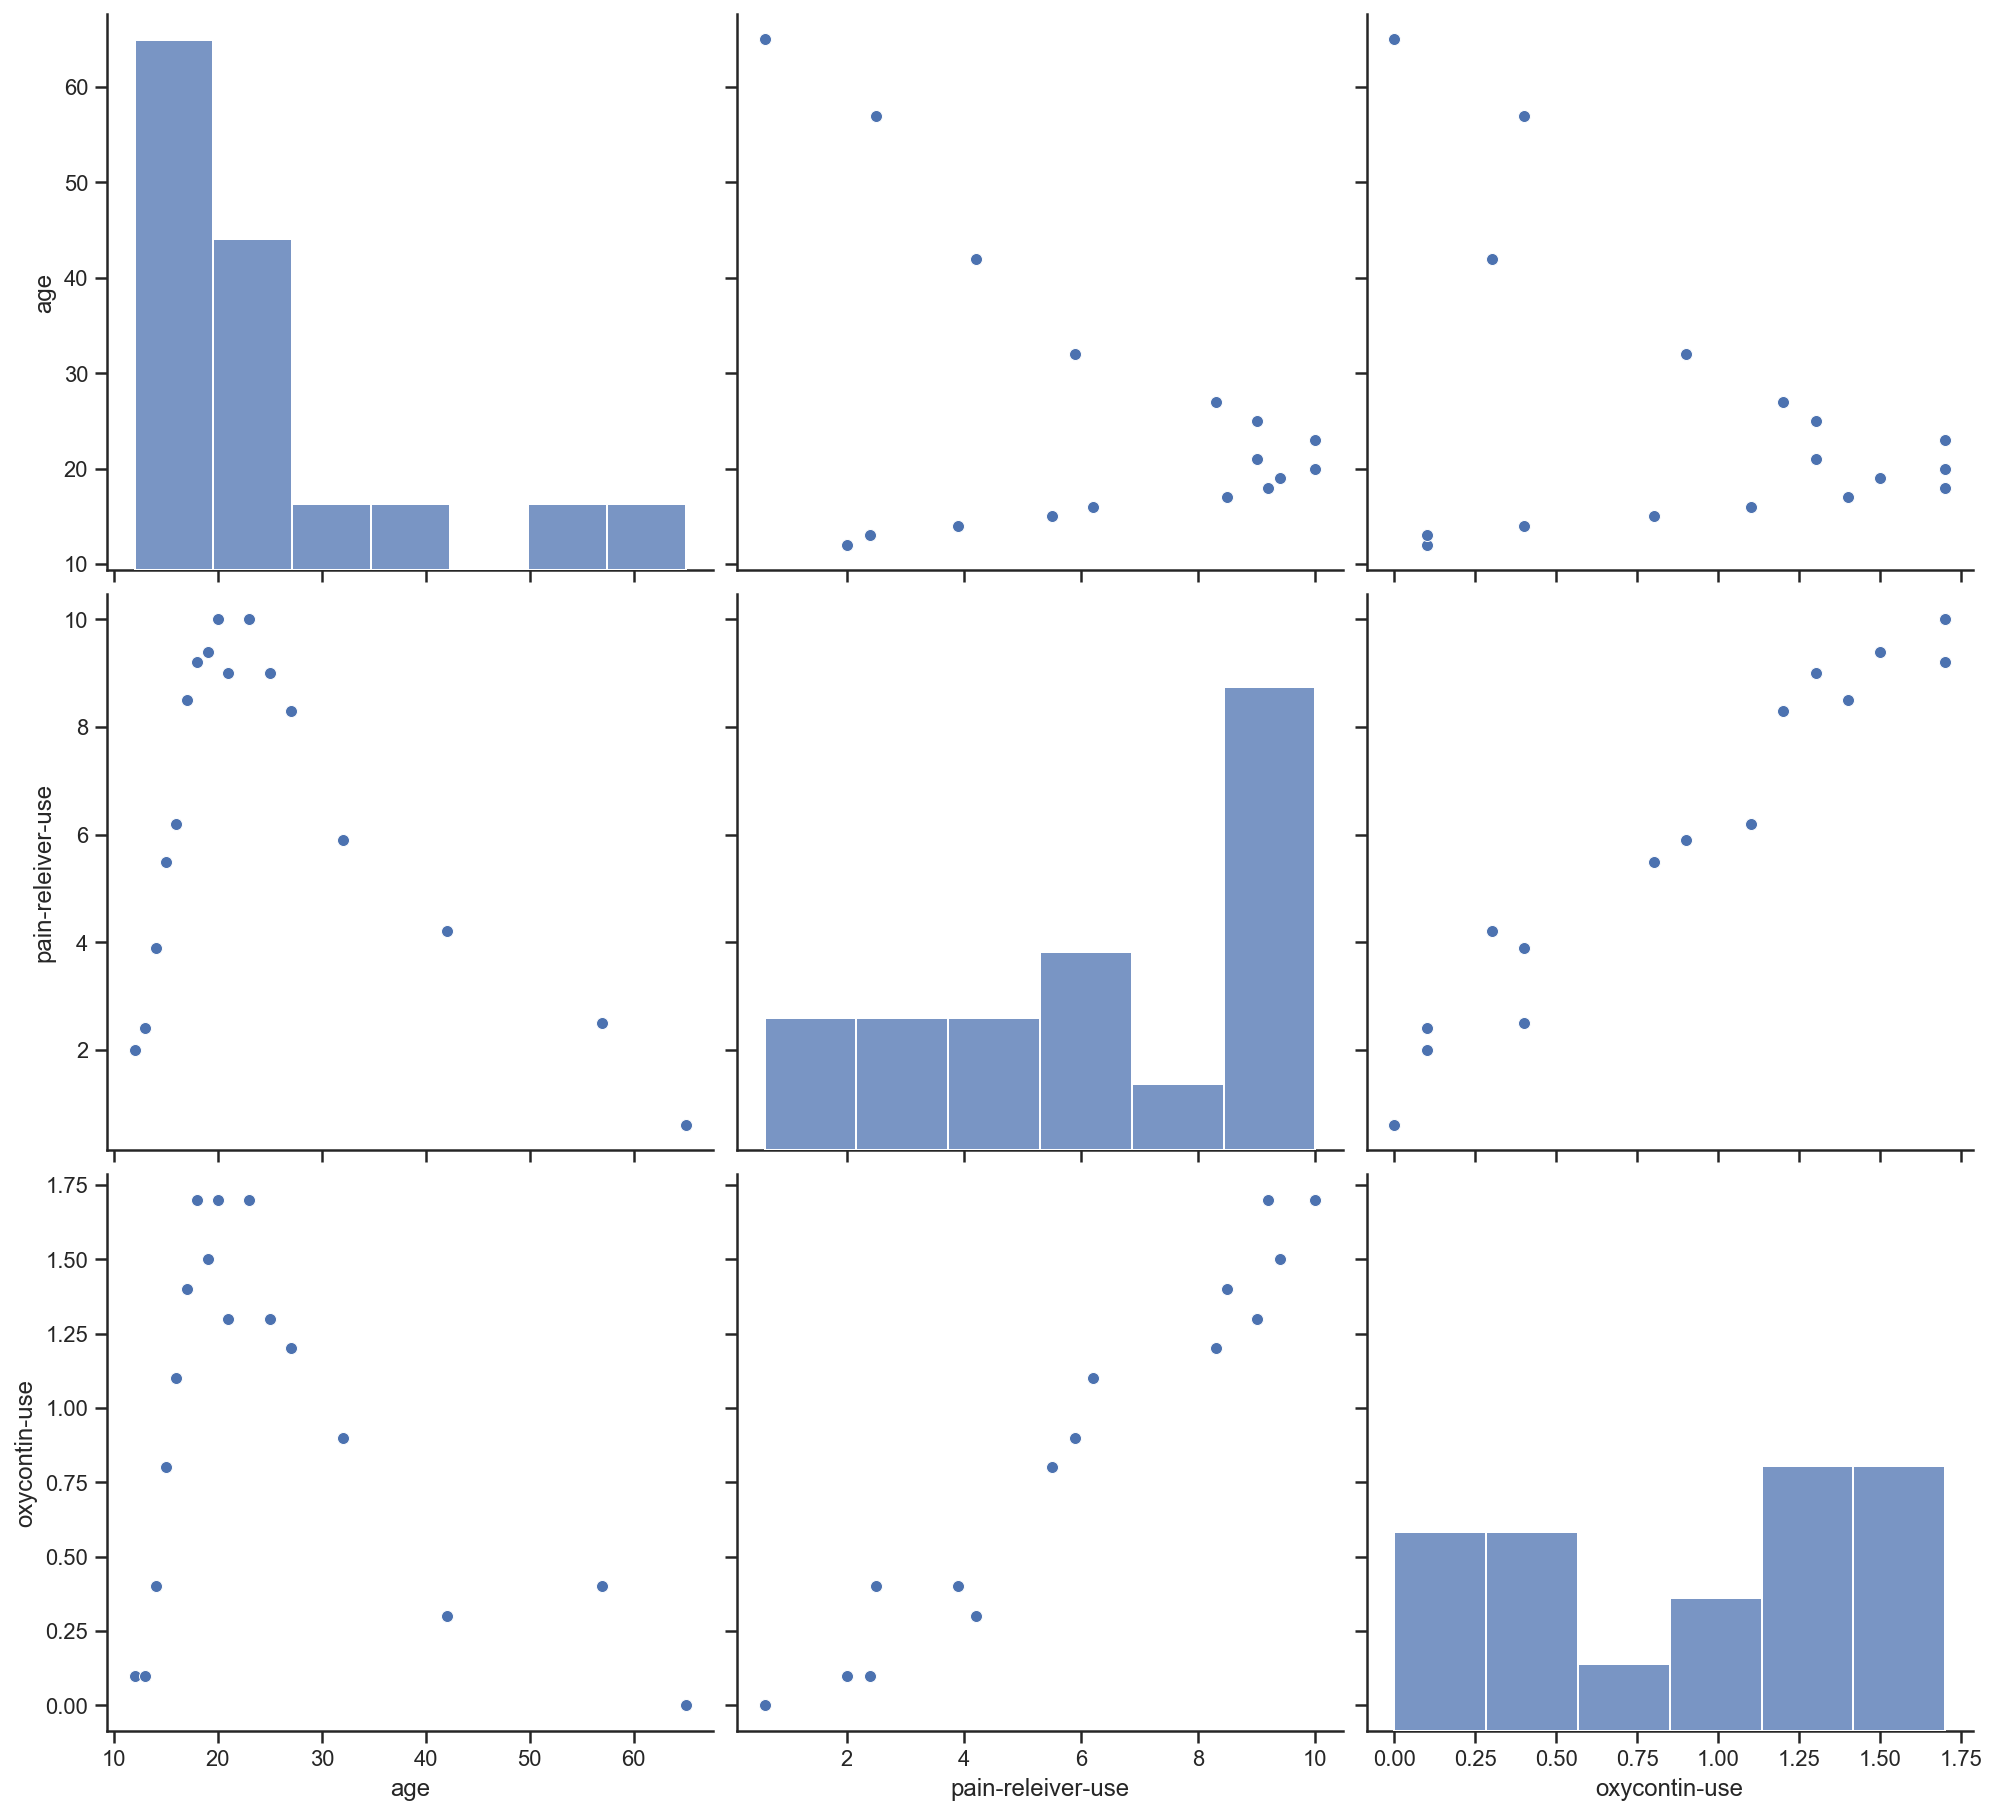

In [1242]:
# I wanted to first check the correlations to see if the age outliers would affect the result
sns.set(style="ticks", color_codes=True)
sns.pairplot(hypothesis, height=4.27, aspect=4.7/4.27);

In [1186]:
# A pairplot allowed me to confirm the strong positive correlation between pain-reliever-use and oxycontin-use.
# I can also see the results are slightly skewed for age, confirming the above boxplot.
# I can also see the distribution for all 3 variables is non-normal.

In [1208]:
# I therefore chose to find the outliers in age (using the boxplot equation)
Outlier = (hypothesis.age.describe()['75%'] + 1.5 *(hypothesis.age.describe()['75%'] - hypothesis.age.describe()['25%']))
print(Outlier)

43.5


In [1209]:
# I then filtered the dataframe by outlier value
hypothesis[(hypothesis['age'] > Outlier)]

,age,pain-releiver-use,oxycontin-use
15,57.0,2.5,0.4
16,65.0,0.6,0.0


In [1210]:
# And dropped the two row with values higher than this 
hypothesis = hypothesis.drop([15])
hypothesis = hypothesis.drop([16])

In [1190]:
# I had hoped that I would be able to group the data by age and find the correlations using groupby and .corr()
# However, the values kept returning as NaN
# Which I now have learnt is because the variables are singular

hypothesis.groupby(['age']).corr().head()

pain-releiver-use  oxycontin-use
age                                                     
12.0 pain-releiver-use                NaN            NaN
     oxycontin-use                    NaN            NaN
13.0 pain-releiver-use                NaN            NaN
     oxycontin-use                    NaN            NaN
14.0 pain-releiver-use                NaN            NaN

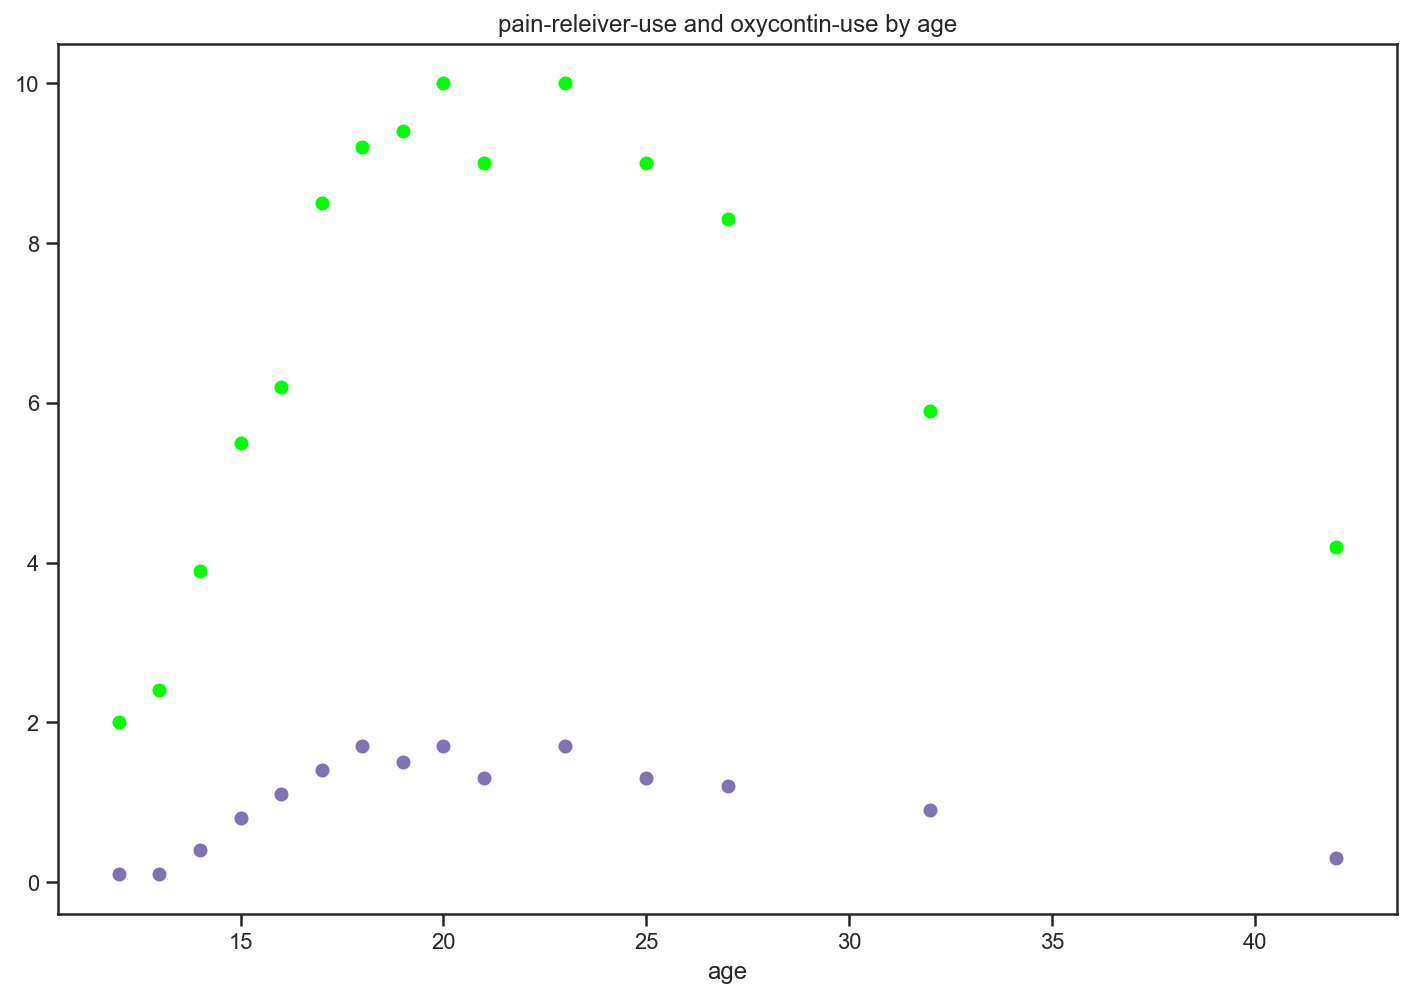

In [1222]:
# I therefore chose to plot the two data-sets together on graphs to try and show the relationship to age
plt.figure(figsize=(12, 8))
color_oxy = ["m"]
color_pain = ["lime"]
plt.scatter(hypothesis.age, hypothesis['oxycontin-use'], color=color_oxy)
plt.scatter(hypothesis.age, hypothesis['pain-releiver-use'], color=color_pain)
plt.xlabel('age')
plt.title('pain-releiver-use and oxycontin-use by age');

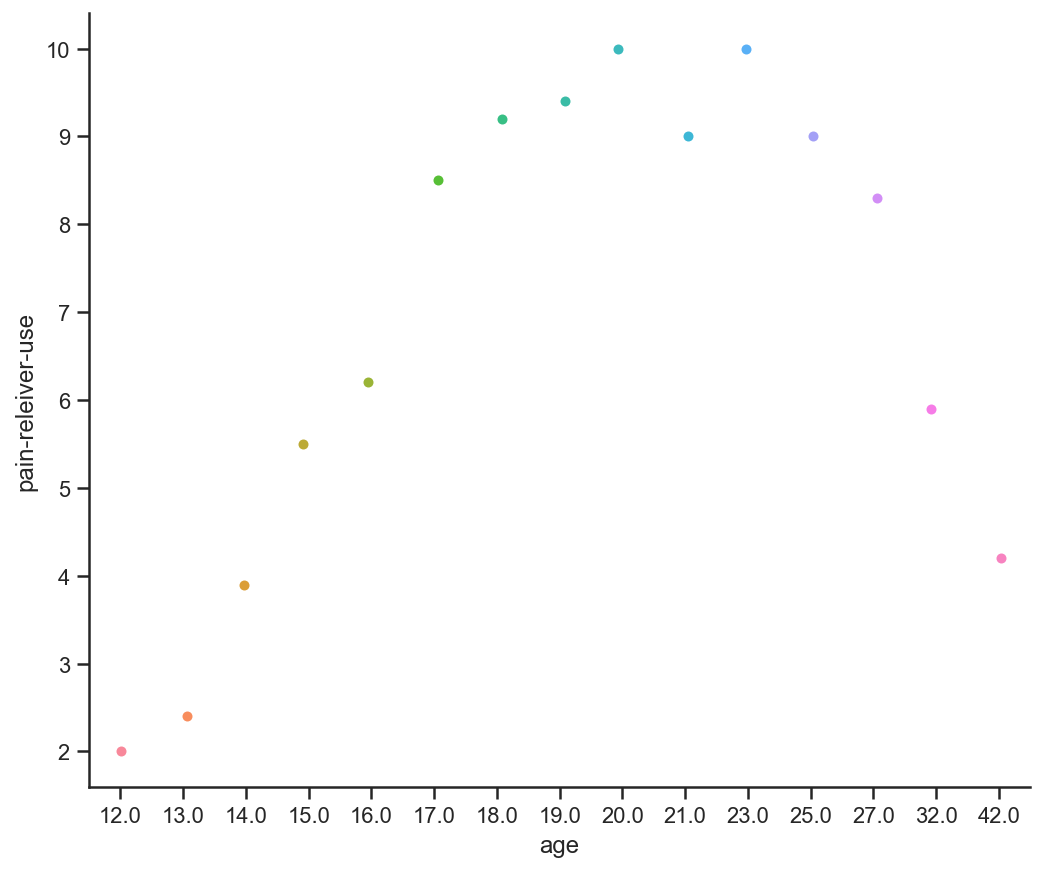

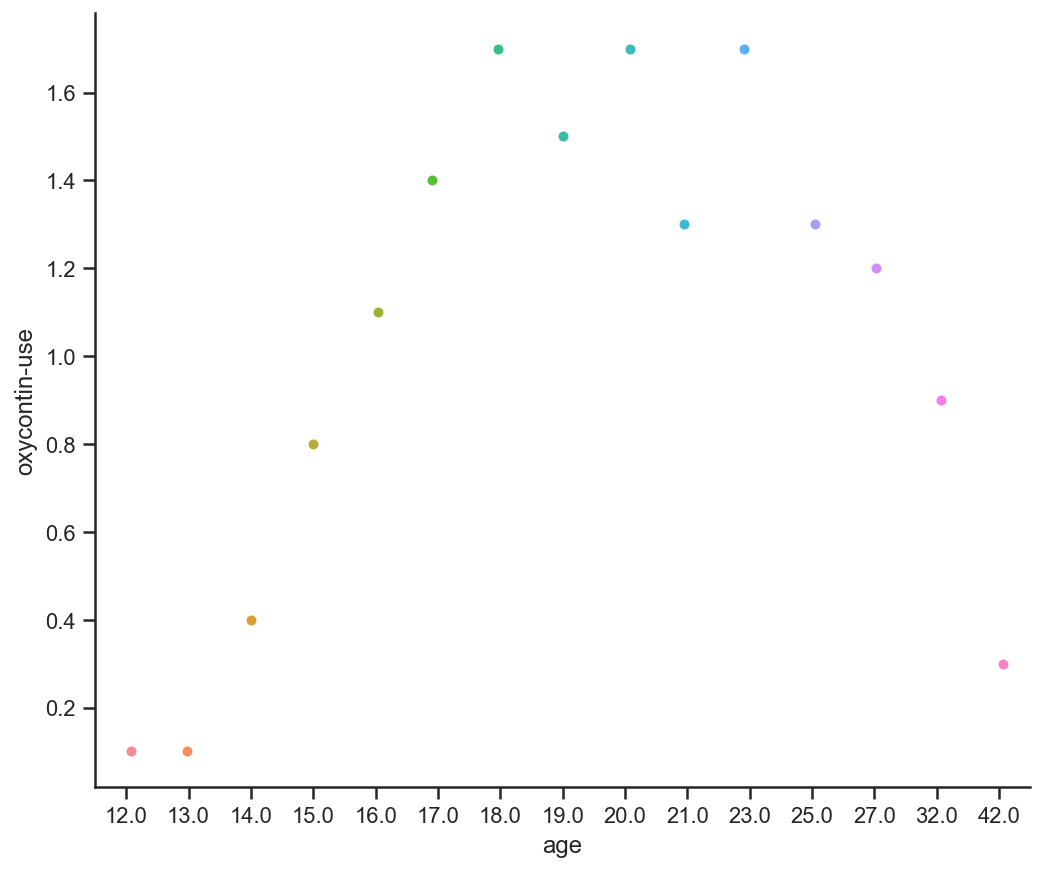

In [1240]:
# The scale of pain-reliver-use to oxycontin was a little out so I placed them next to each other but seperate
sns.catplot(x='age', y='pain-releiver-use', data=hypothesis, height=6, aspect=1.2)
sns.catplot(x='age', y='oxycontin-use', data=hypothesis, height=6, aspect=1.2);

In [ ]:
# Here we can see a much clearer representation of pain-releiver-use vs age and oxycontin-use vs age.
# So as we can see there is a peak and a drop with the use of either drug vs age. Both drugs grow in use along with
# age until we reach around 25. From there the relationship becomes negative and the higher the age the less the
# use of either drug.

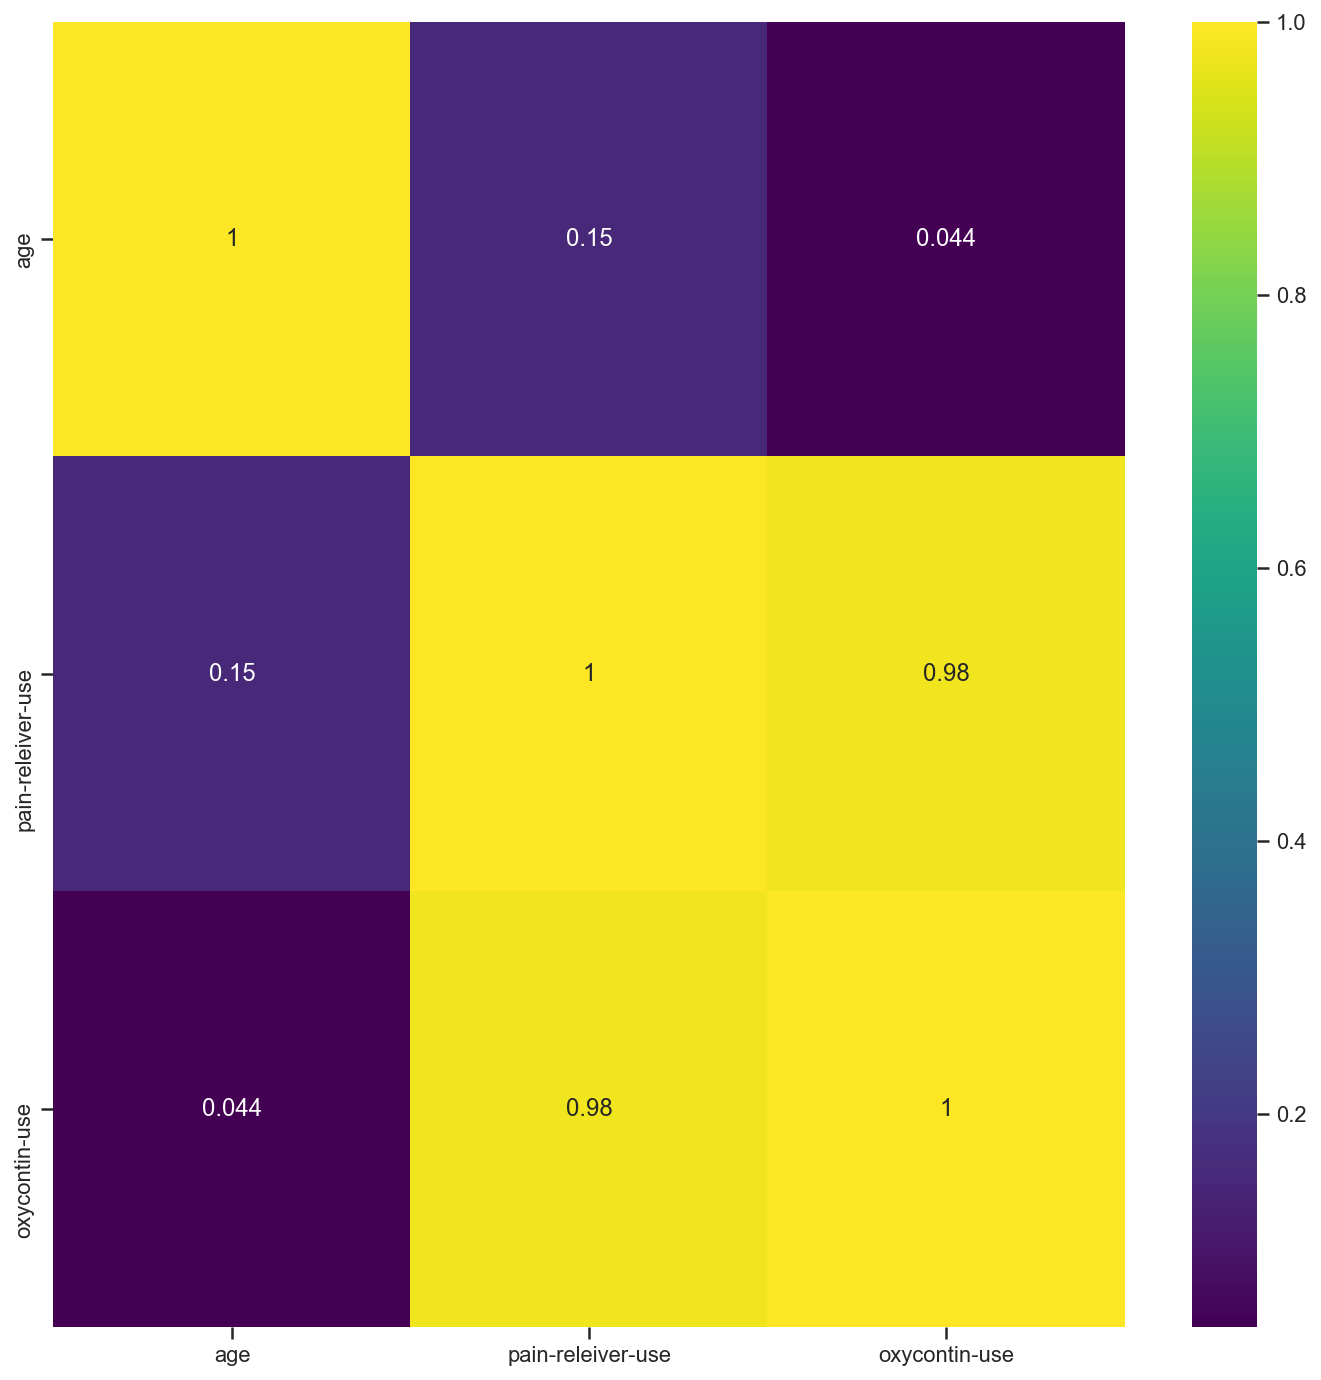

In [1230]:
# checking change in correlations after outliers removed
plt.figure(figsize=(12, 12))
sns.heatmap(hypothesis.corr(), cmap='viridis', annot=True);

In [ ]:
# So what did we find out?...

# We can hypothesise that there is a strong correlation between the use of pain-relievers and the use of oxycontin.

# We can prove this hypothesis correct using the covariance and pearsons correlation. We found that there was a
# 0.98 correlation between the two variables, with 1 being a perfectly positive correlation, this is very close.
# This correlation would be strong enough to work our predictive model around, and we may begin to hypothesise 
# that a patient who needs pain-relief may start with pain-releiver drugs and work up to oxycontin if the symptoms
# persist.

# Does the correlation change with age?

# Although, at this time, we could not filter the data to show a correlation by age, we could see that there were
# positive correlations on our .catplot between pain-releiver-use and those 12 - 25 and between oxycontin-use
# and those in the same age group. We could therefore infer with the data that we have that the correlation between
# pain-reliever-use and oxycontin-use is a strong positive one, throughout the age groups, and eventhough the correlation
# between age and the use of these two drugs is negative after the age of 25, as both .catplots follow the same 
# pattern the relationship between the drugs would stay the same.

# Are there any outliers?

# Yes we found outliers in our age category, we can see from the heatmap that the correlations between the drugs-use
# and the age moves from a negative (pain vs age = -0.44, oxycontin vs age = -0.39) to a very weak postive one.
# This would be backed up by looking at the .catplots which show a positive correlation up to age 25, then a 
# negative from 25 - 65, balancing the correlation out to near 0.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
# Are there outliers in the dataset? Define, in words, how you numerically define outliers.


# I had originally associated an outlier with 'boxplots', meaning - an outlier is defined as being any point of 
# data that lies over 1.5 inter-quartile-rate below the first quartile (25%) or above the third quartile (75%).


In [973]:
print(sats.Rate.describe()['75%'] + 1.5 *(sats.Rate.describe()['75%'] - sats.Rate.describe()['25%']))

146.5


In [974]:
print(sats.Rate.describe()['25%'] - 1.5 *(sats.Rate.describe()['75%'] - sats.Rate.describe()['25%']))

-73.5


In [ ]:
# This did give me 'outliers' of 146.5 and -73.5, however, there were no variables behind these numbers in 
# the dataset. So I researched into statistical outliers to find that an outlier is usually 3 standard deviations 
# away from the mean. Meaning the calculation would have been:
# Outlier = mean - 3*std or Outlier = mean + 3*std, which I also performed on the data in Rate, and found no 
# outliers here either. I then dug further and found that this equation is normally performed with data that has
# normal distributions, which Rate is not......so I thought I may have read the question incorrectly.......

In [ ]:
# I then went to work on the Verbal and Maths scores instead.

In [975]:
sats.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [ ]:
# First by calculating the Outliers

In [976]:
Verbal_Outlier_Lower = (sats.Verbal.describe()['mean'] - sats.Verbal.describe()['std']*3)
Verbal_Outlier_Higher = (sats.Verbal.describe()['mean'] + sats.Verbal.describe()['std']*3)
print('Verbal Outlier Lower =', Verbal_Outlier_Lower)
print('Verbal Outlier Higher =', Verbal_Outlier_Higher)

Verbal Outlier Lower = 432.44741009195985
Verbal Outlier Higher = 632.6114134374518


In [977]:
Math_Outlier_Lower = (sats.Math.describe()['mean'] - sats.Math.describe()['std']*3)
Math_Outlier_Higher = (sats.Math.describe()['mean'] + sats.Math.describe()['std']*3)

In [978]:
print('Math Outlier Lower =', Math_Outlier_Lower)
print('Math Outlier Higher =', Math_Outlier_Higher)

Math Outlier Lower = 422.98095779092534
Math Outlier Higher = 640.7053167188786


In [979]:
# Then by applying the filters to the dataset

In [980]:
sats[(sats['Verbal'] < Verbal_Outlier_Lower) | (sats['Verbal'] > Verbal_Outlier_Higher)]

,State,Rate,Verbal,Math,Verbal - Math


In [981]:
sats[(sats['Math'] < Math_Outlier_Lower) | (sats['Math'] > Math_Outlier_Higher)]

,State,Rate,Verbal,Math,Verbal - Math


In [ ]:
# And I still have not been able to identify an outlier.

In [ ]:
# I also applied a boxplot to Verbal and Math in Q 4.2 and no outliers were shown via this method either.
# However the minimum value on the Math boxplot is slightly out of range of the others. 

In [982]:
sats[(sats['Math'] == 439)]

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95


In [ ]:
# This is the most 'out of range' piece of data I could find, but not technically an outlier.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [1204]:
rate_percentile = [] 

# appends the percentile ranking of each participation rate into the rate_percentile list
for value in sats['Rate']:
    rate_percentile.append(stats.percentileofscore(sats['Rate'], value))

# adds new column to sats dataframe
sats['Percentile'] = rate_percentile

print(sats.loc[sats['State'] == 'CA', 'Percentile'])

23    55.882353
Name: Percentile, dtype: float64


In [ ]:
# How is percentile related to the Spearman rank correlation?

# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 
# In a similiar way, the percentiles rank the values relative to the highest or lowest number in a set.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

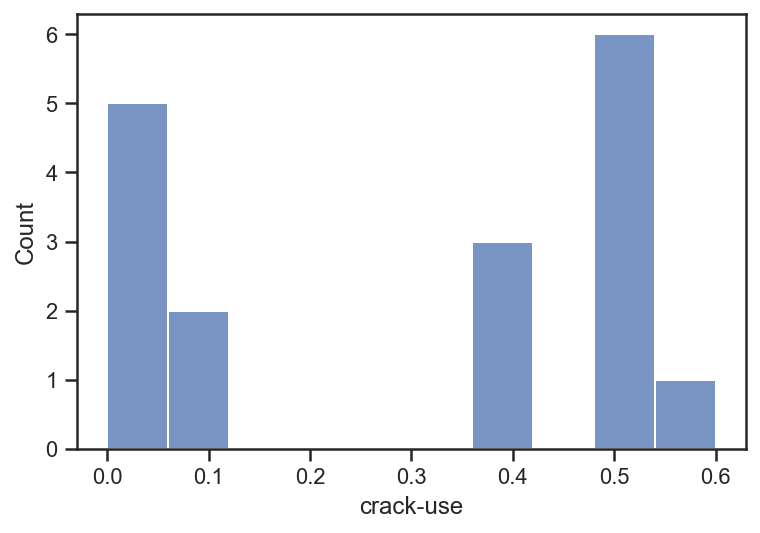

In [1259]:
sns.histplot(drugs['crack-use'], bins=10);

In [1247]:
drugs_rate_percentile = [] 

# appends the percentile ranking of each participation rate into the rate_percentile list
for value in drugs['crack-use']:
    drugs_rate_percentile.append(stats.percentileofscore(drugs['crack-use'], value))

# adds new column to dataframe
drugs['Percentile'] = drugs_rate_percentile

In [1248]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,Percentile
0,12.0,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,17.647059
1,13.0,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,17.647059
2,14.0,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,17.647059
3,15.0,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,38.235294
4,16.0,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,17.647059


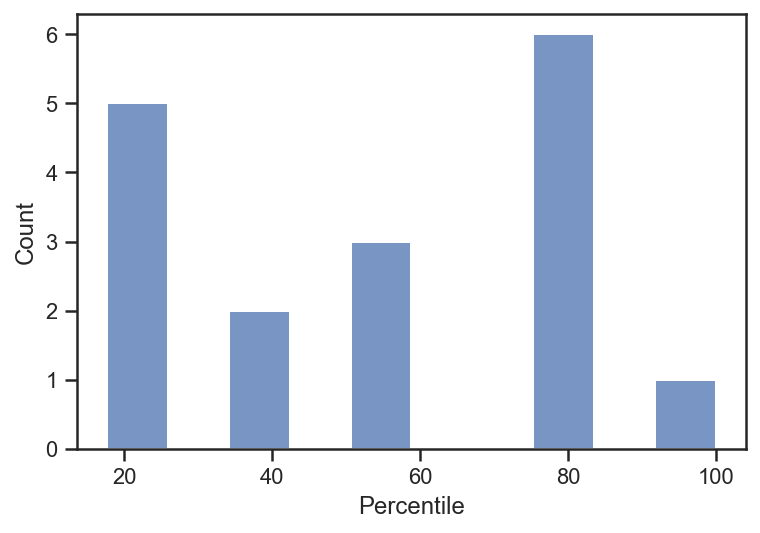

In [1256]:
sns.histplot(drugs['Percentile'], bins=10);

In [ ]:
# I did google for help on these ones, I think I have completed the percentiles calcualtions but I am not 100%
# sure on what to plot or how to explain what has happened. I need to research into this more.